In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import scipy.stats

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
#from xgboost import XGBRegressor

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Life_Expectancy_Data.xlsx to Life_Expectancy_Data.xlsx


Lecture du jeu de donné d'après le répertoire "data"

In [2]:
data_prediction = pd.read_excel("data/Life_Expectancy_Data.xlsx")

# 1. Prétraitement et exploration des données

### 1.1 Nettoyage des données
---

In [3]:
data_prediction.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
print(f'Il y en a {len(data_prediction.columns)} colonnes')

Il y en a 22 colonnes


Supression des espaces entre les mots des colonnes et à la fin et au début

In [3]:
print(f'les noms des anciennes colonnes \n {data_prediction.columns} \n\n')

new_columns = []
columns = list(data_prediction.columns)
for col in columns:
    a = col.split()
    b = '_'.join(a)
    new_columns.append(b)
data_prediction.columns =new_columns

print(f'les noms des nouvelles colonnes \n {data_prediction.columns}')

les noms des anciennes colonnes 
 Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object') 


les noms des nouvelles colonnes 
 Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')


In [21]:
counts=data_prediction.Country.value_counts().tail(15)
counts

Country
Eritrea      16
Estonia      16
Ethiopia     16
Fiji         16
Finland      16
France       16
Gabon        16
Gambia       16
Georgia      16
Germany      16
Ghana        16
Greece       16
Grenada      16
Guatemala    16
Zimbabwe     16
Name: count, dtype: int64

Comptons le nombre d’occurrences pour chaque pays dans la colonne ‘Country’, ensuite obtenos la liste des pays ayant un count égal à 1, puis supprimons les lignes correspondant à ces pays

In [4]:
counts = data_prediction['Country'].value_counts()
print(data_prediction['Country'].isin(pays_a_supprimer))
data_prediction = data_prediction[~data_prediction['Country'].isin(pays_a_supprimer)]


NameError: name 'pays_a_supprimer' is not defined

In [7]:
data_prediction[['HIV/AIDS', 'Income_composition_of_resources', 'Schooling', 'BMI', 'Adult_Mortality']]

,HIV/AIDS,Income_composition_of_resources,Schooling,BMI,Adult_Mortality
0,0.1,0.479,10.1,19.1,263.0
1,0.1,0.476,10.0,18.6,271.0
2,0.1,0.470,9.9,18.1,268.0
3,0.1,0.463,9.8,17.6,272.0
4,0.1,0.454,9.5,17.2,275.0
...,...,...,...,...,...
2933,33.6,0.407,9.2,27.1,723.0
2934,36.7,0.418,9.5,26.7,715.0
2935,39.8,0.427,10.0,26.3,73.0
2936,42.1,0.427,9.8,25.9,686.0


In [29]:
data_prediction.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,NaN,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,NaN,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,NaN,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,NaN,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,NaN,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [30]:
data_prediction['Status'] = data_prediction['Status'].map({'Developing': 0, 'Developed': 1})

Séparation entre les colonnes qualtiatives et ceux quantitatives

In [31]:
vars_quant = data_prediction.select_dtypes(include='number')

vars_qualt = data_prediction.select_dtypes(exclude='number')

In [32]:
vars_qualt.head()

,Country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan


Ce code est pour de meilleurs visulisations

In [ ]:
sns.set_context('poster')

Traitons-nous les valeurs aberrantes
Cette partie affiche les valeurs aberrantes avant winsorizing

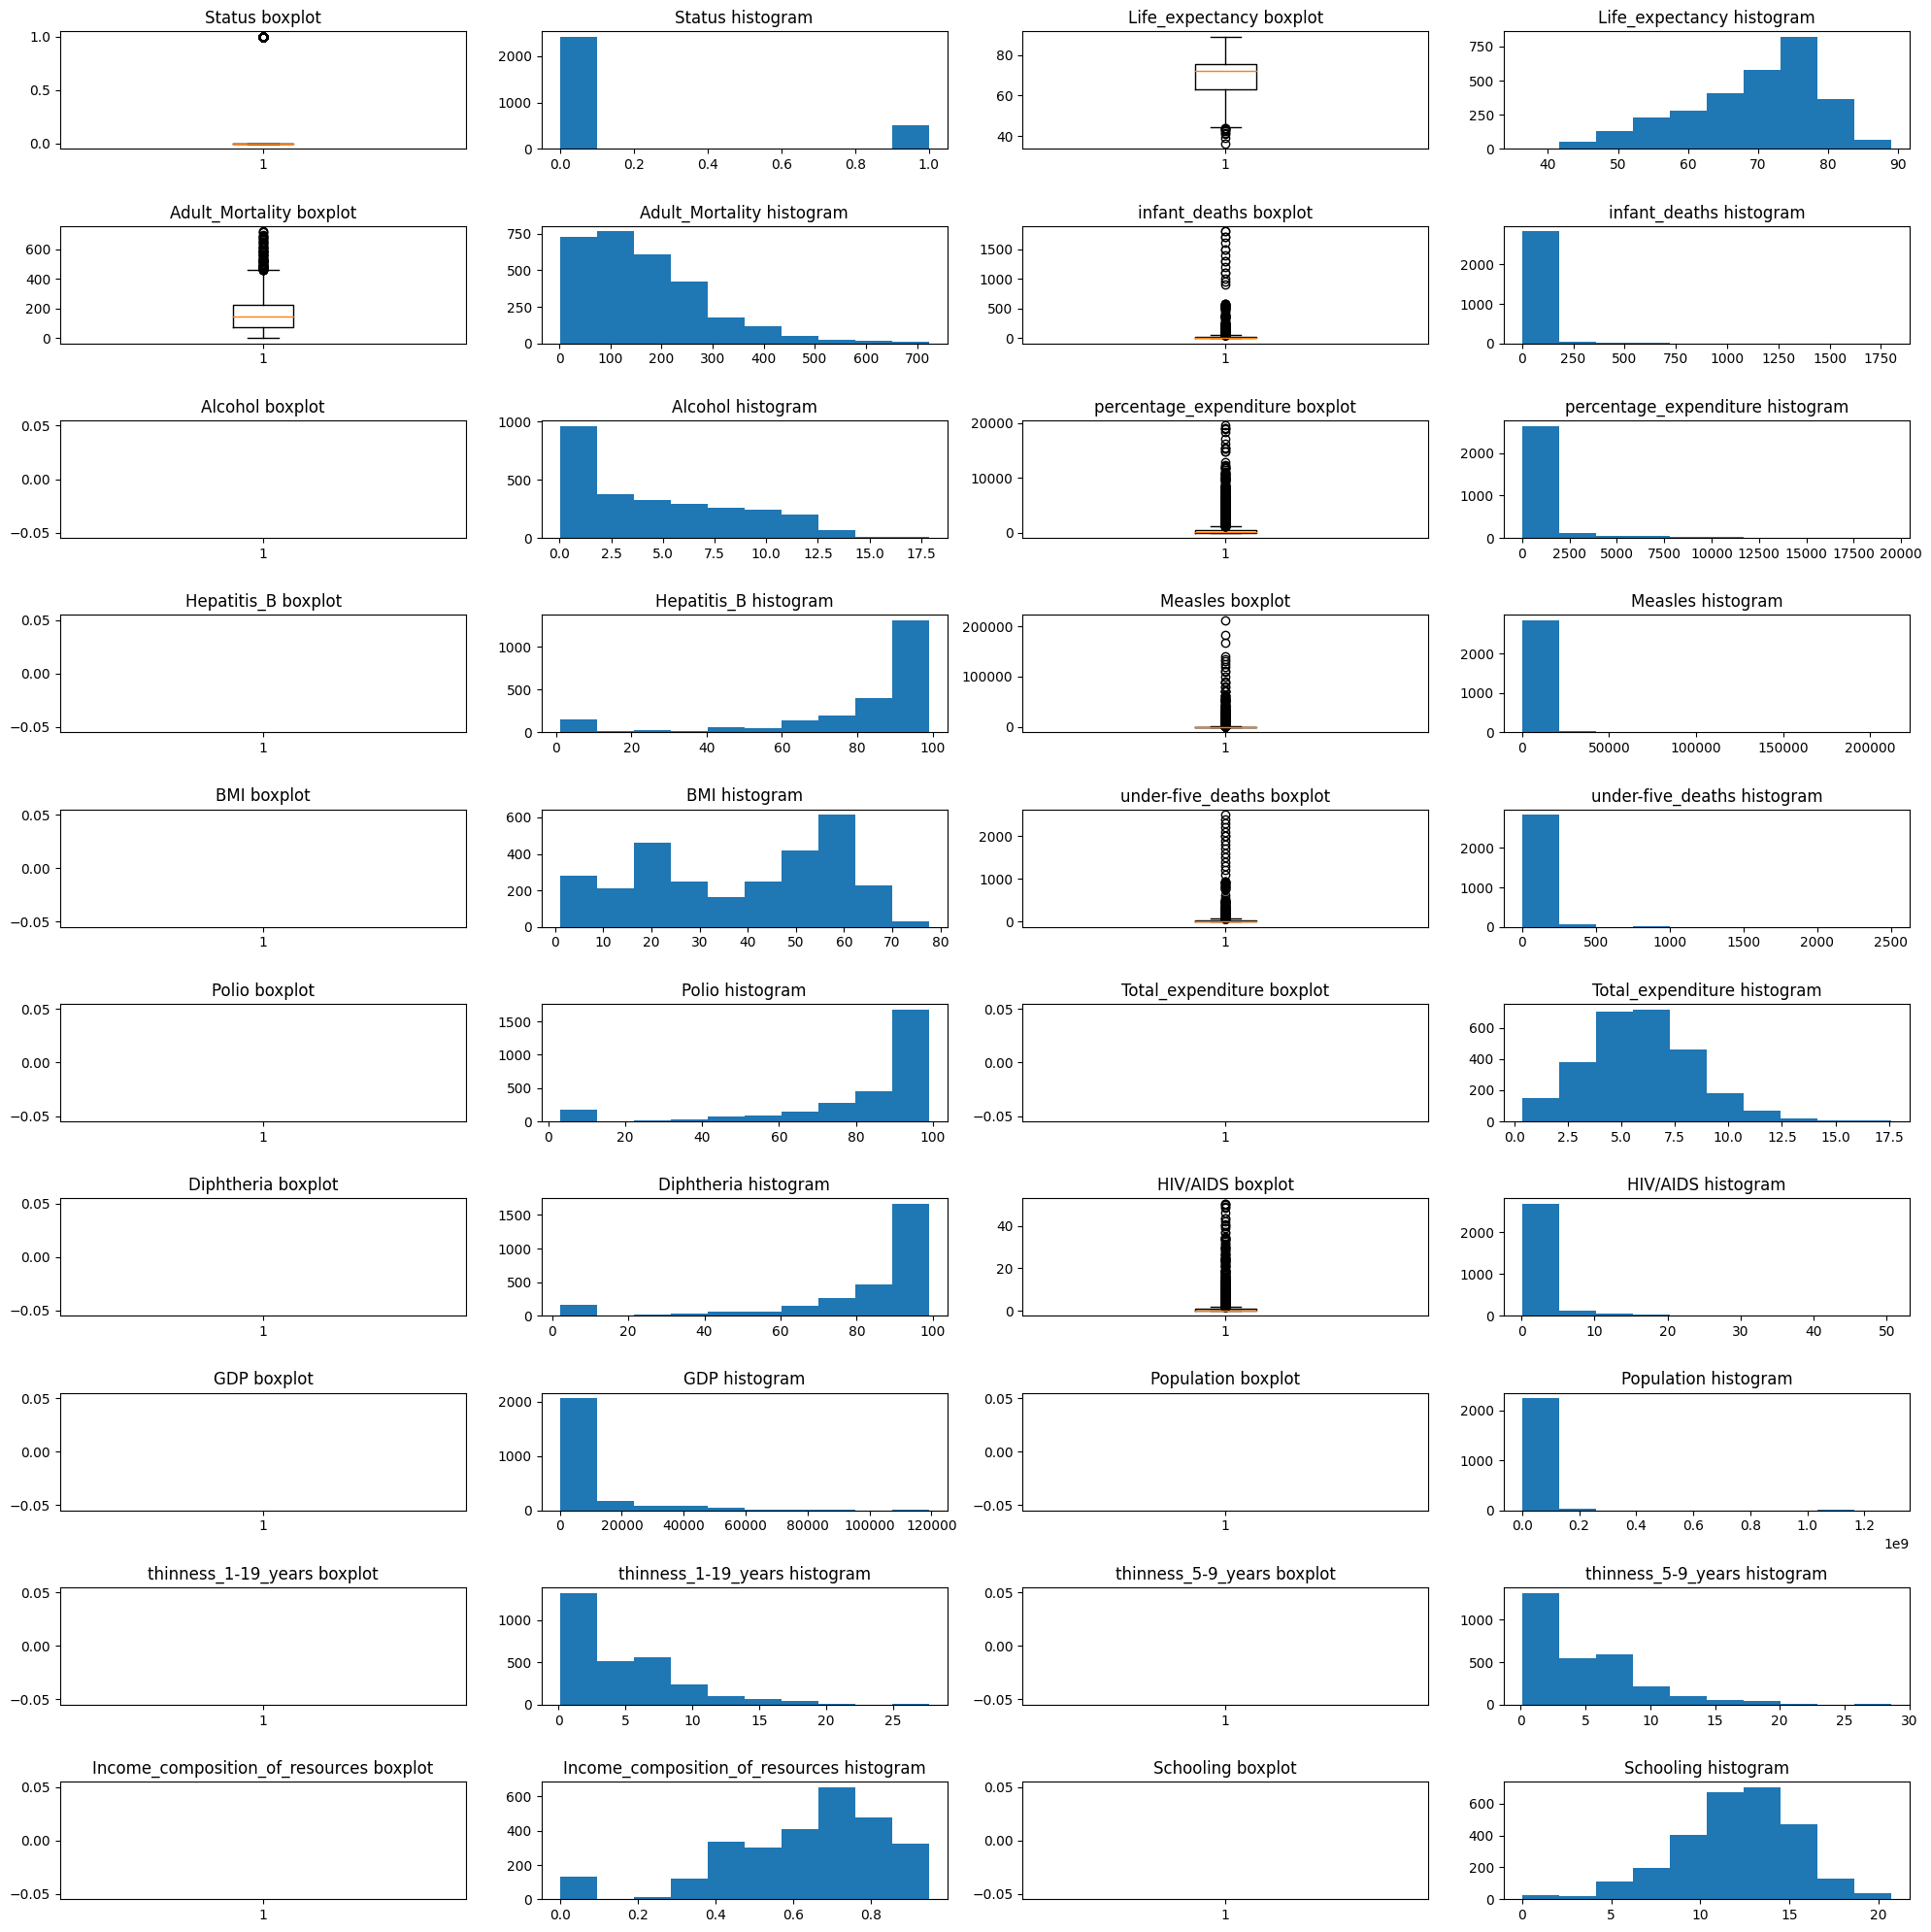

In [ ]:
columns = vars_quant.drop('Year', axis = 1)
plt.figure(figsize=(20, 20))
i = 0
for feature in columns:
    i += 1
    plt.subplot(10, 4, i)
    plt.tight_layout()
    plt.boxplot(vars_quant[feature])
    plt.title('{} boxplot'.format(feature))
    i += 1
    plt.subplot(10, 4, i )
    plt.tight_layout()
    plt.hist(vars_quant[feature])
    plt.title('{} histogram'.format(feature))
plt.show()

Cette figure ci-dessus montre le boxplot et l’histogramme pour chaque caractéristique numérique de l’ensemble de données avant le winsorizing des valeurs aberrantes.
Les valeurs aberrantes seront winsorisées ; elles ne seront pas supprimées afin de ne pas perdre d’informations importantes. Les percentiles ont été définis manuellement pour chaque caractéristique, en dehors desquels les valeurs aberrantes seraient remplacées.

In [ ]:
winsorizedNumericalImputedFeats = vars_quant.copy()
winsorizedNumericalImputedFeats['Life_expectancy'] = winsorize(vars_quant['Life_expectancy'], (0.01, 0))

winsorizedNumericalImputedFeats['Adult_Mortality'] = winsorize(vars_quant['Adult_Mortality'], (0, 0.05))

winsorizedNumericalImputedFeats['infant_deaths'] = winsorize(vars_quant['infant_deaths'], (0, 0.1))

winsorizedNumericalImputedFeats['Alcohol'] = winsorize(vars_quant['Alcohol'], (0, 0.01))

winsorizedNumericalImputedFeats['percentage_expenditure'] = winsorize(vars_quant['percentage_expenditure'], (0, 0.2))

winsorizedNumericalImputedFeats['Hepatitis_B'] = winsorize(vars_quant['Hepatitis_B'], (0.1, 0))

winsorizedNumericalImputedFeats['Measles'] = winsorize(vars_quant['Measles'], (0, 0.2))

winsorizedNumericalImputedFeats['under-five_deaths'] = winsorize(vars_quant['under-five_deaths'], (0, 0.2))

winsorizedNumericalImputedFeats['Polio'] = winsorize(vars_quant['Polio'], (0.1, 0))

winsorizedNumericalImputedFeats['Total_expenditure'] = winsorize(vars_quant['Total_expenditure'], (0, 0.01))

winsorizedNumericalImputedFeats['Diphtheria'] = winsorize(vars_quant['Diphtheria'], (0.1, 0))

winsorizedNumericalImputedFeats['HIV/AIDS'] = winsorize(vars_quant['HIV/AIDS'], (0, 0.2))

winsorizedNumericalImputedFeats['GDP'] = winsorize(vars_quant['GDP'], (0, 0.2))

winsorizedNumericalImputedFeats['Population'] = winsorize(vars_quant['Population'], (0, 0.2))

winsorizedNumericalImputedFeats['thinness _1-19_years'] = winsorize(vars_quant['thinness_1-19_years'], (0, 0.2))

winsorizedNumericalImputedFeats['thinness_5-9_years'] = winsorize(vars_quant['thinness_5-9_years'], (0, 0.05))

winsorizedNumericalImputedFeats['Income_composition_of_resources'] = winsorize(vars_quant['Income_composition_of_resources'], (0.05, 0))

winsorizedNumericalImputedFeats['Schooling'] = winsorize(vars_quant['Schooling'], (0.02, 0.01))

In [ ]:
winsorizedNumericalImputedFeats.head()

,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,thinness _1-19_years
0,2015,0,65.0,263.0,58,0.01,71.279624,65.0,756,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,15.1,0.479,10.1,8.0
1,2014,0,59.9,271.0,58,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,15.1,0.476,10.0,8.0
2,2013,0,59.9,268.0,58,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,15.1,0.470,9.9,8.0
3,2012,0,59.5,272.0,58,0.01,78.184215,67.0,756,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,15.1,0.463,9.8,8.0
4,2011,0,59.2,275.0,58,0.01,7.097109,68.0,756,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,15.1,0.454,9.5,8.0


Les valeurs aberrantes après winsorizing

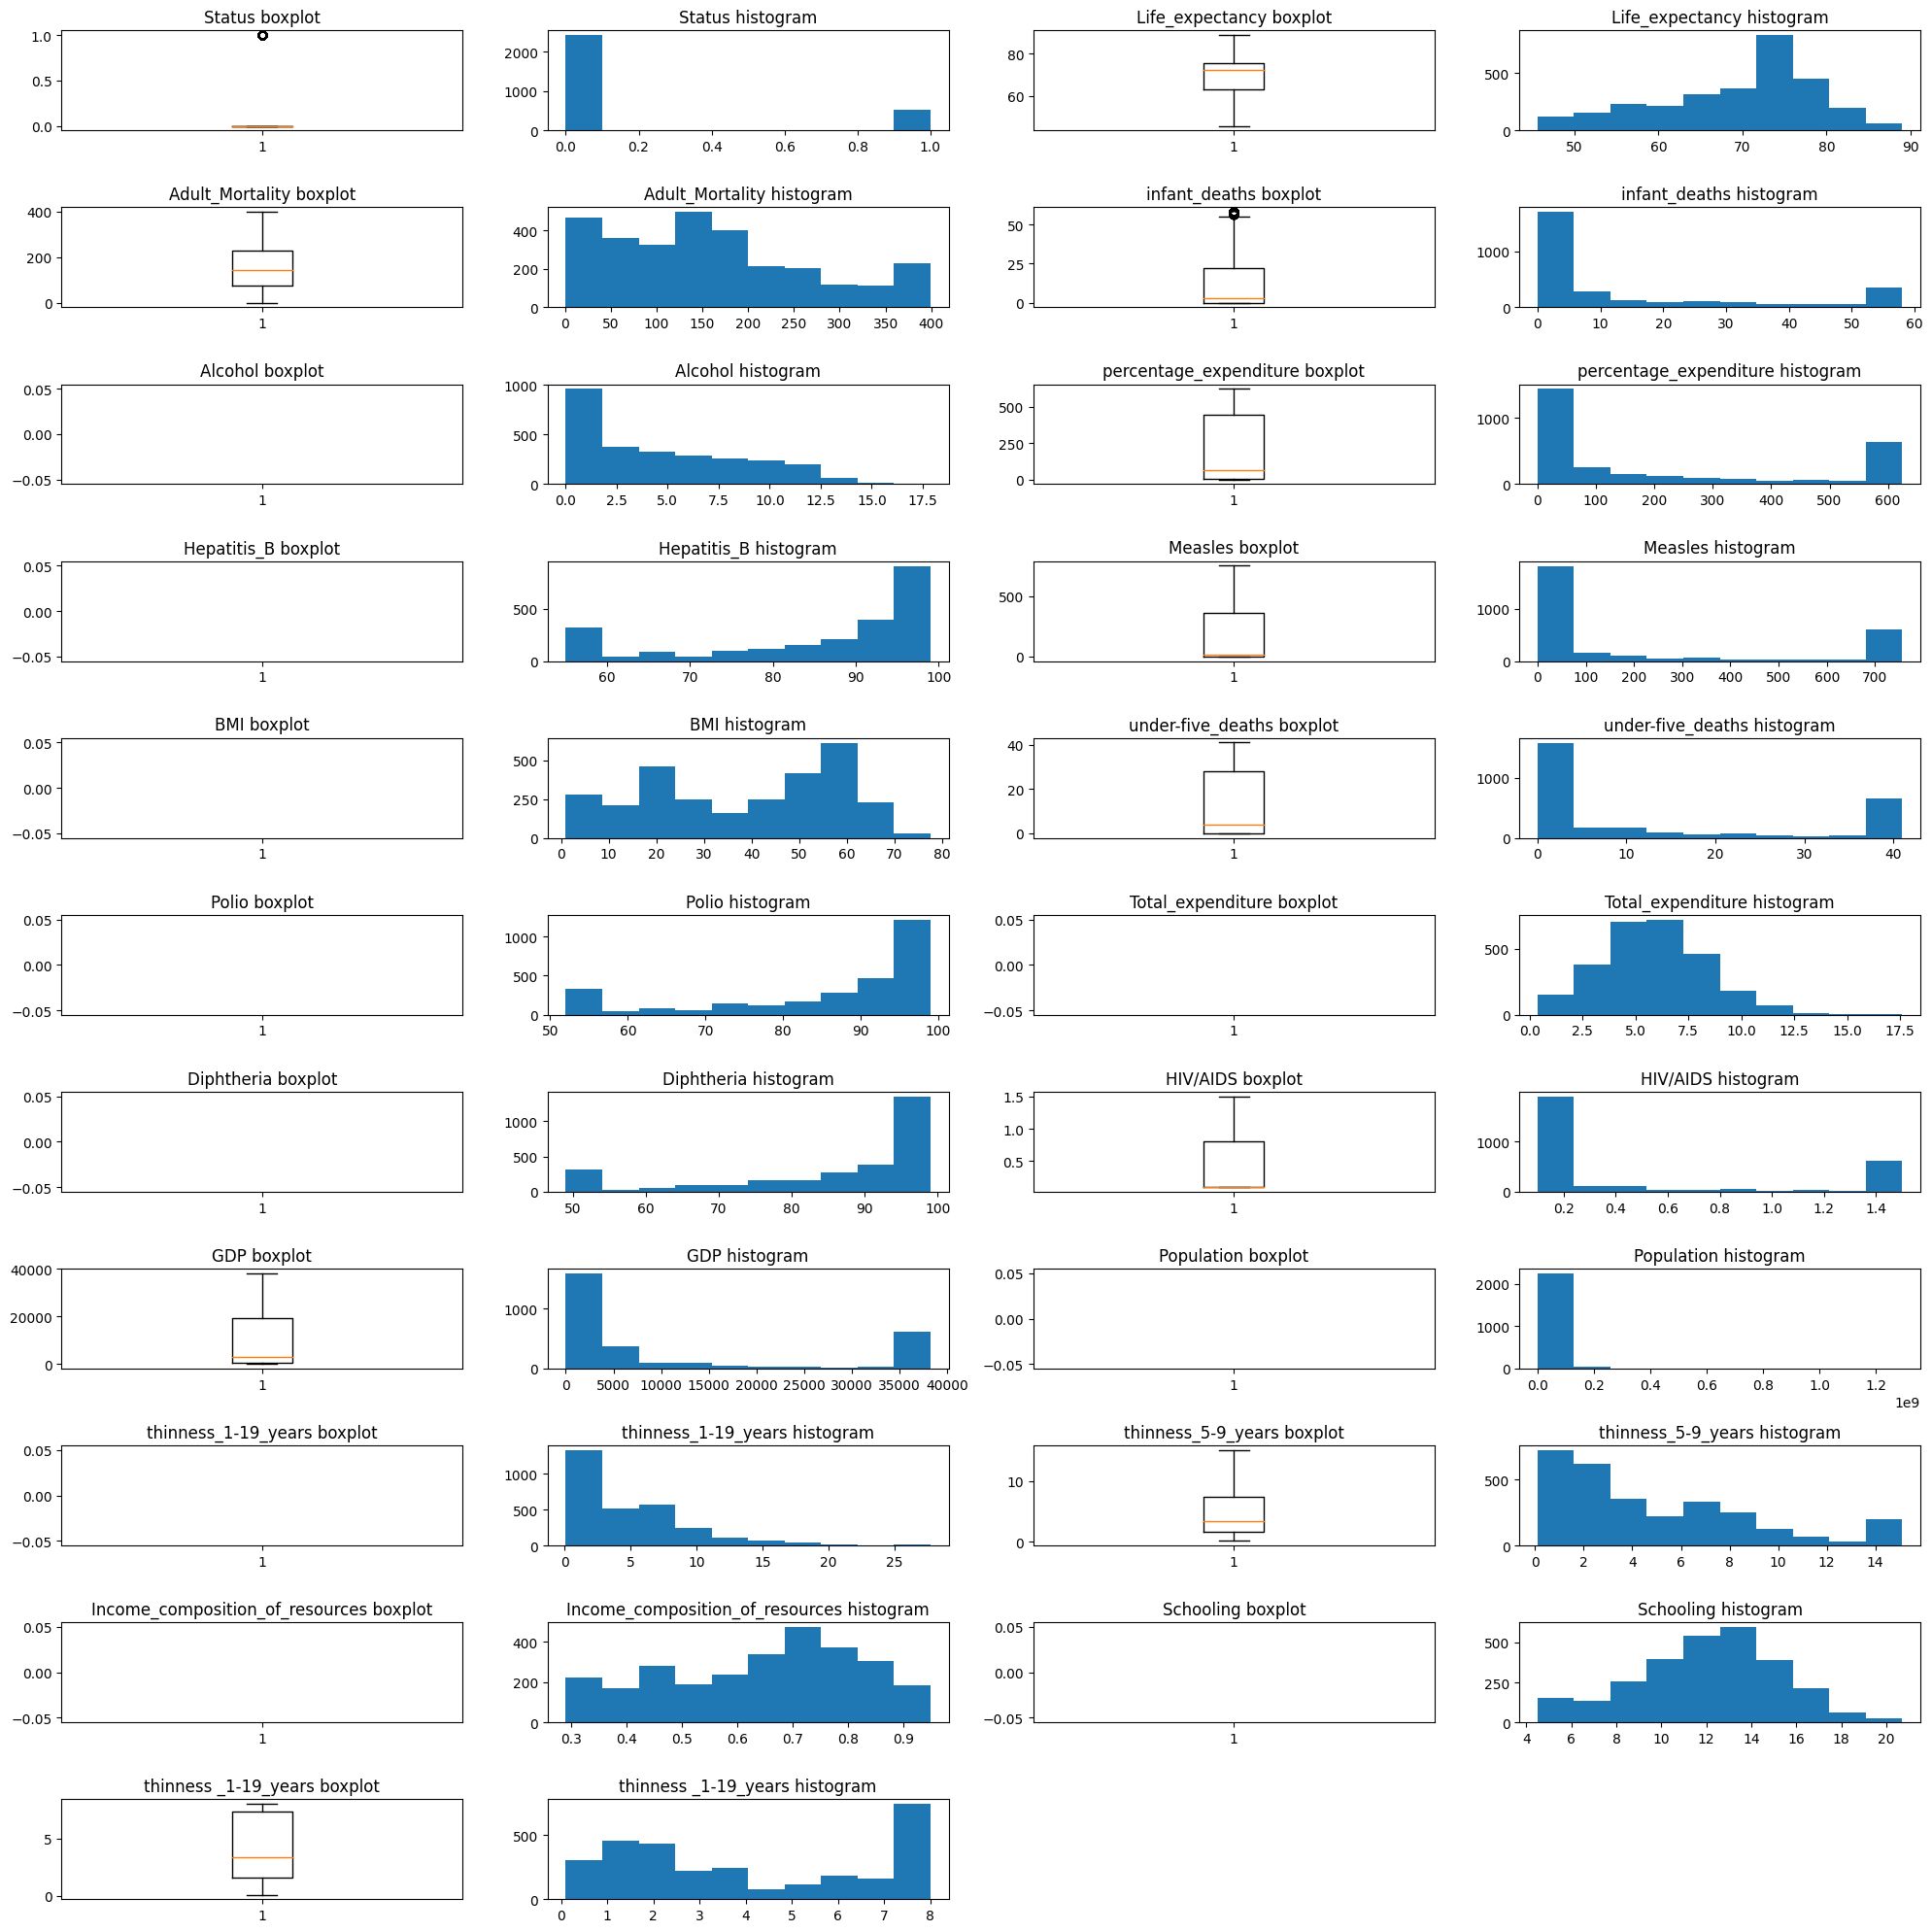

In [ ]:
plt.figure(figsize=(20, 20))
i = 0
for feature in winsorizedNumericalImputedFeats.drop('Year', axis = 1):
    i += 1
    plt.subplot(11, 4, i)
    plt.tight_layout()
    plt.boxplot(winsorizedNumericalImputedFeats[feature])
    plt.title('{} boxplot'.format(feature))
    i += 1
    plt.subplot(11, 4, i )
    plt.tight_layout()
    plt.hist(winsorizedNumericalImputedFeats[feature])
    plt.title('{} histogram'.format(feature))
plt.show()

Fusionnens les caractéristiques catégorielles avec ceux numériques winsorisées.

In [ ]:
winsorizedImputedFeats = pd.concat([vars_qualt, winsorizedNumericalImputedFeats],axis=1)
dfExpImputed = winsorizedImputedFeats

Relation des caractéristiques avec la variable cible

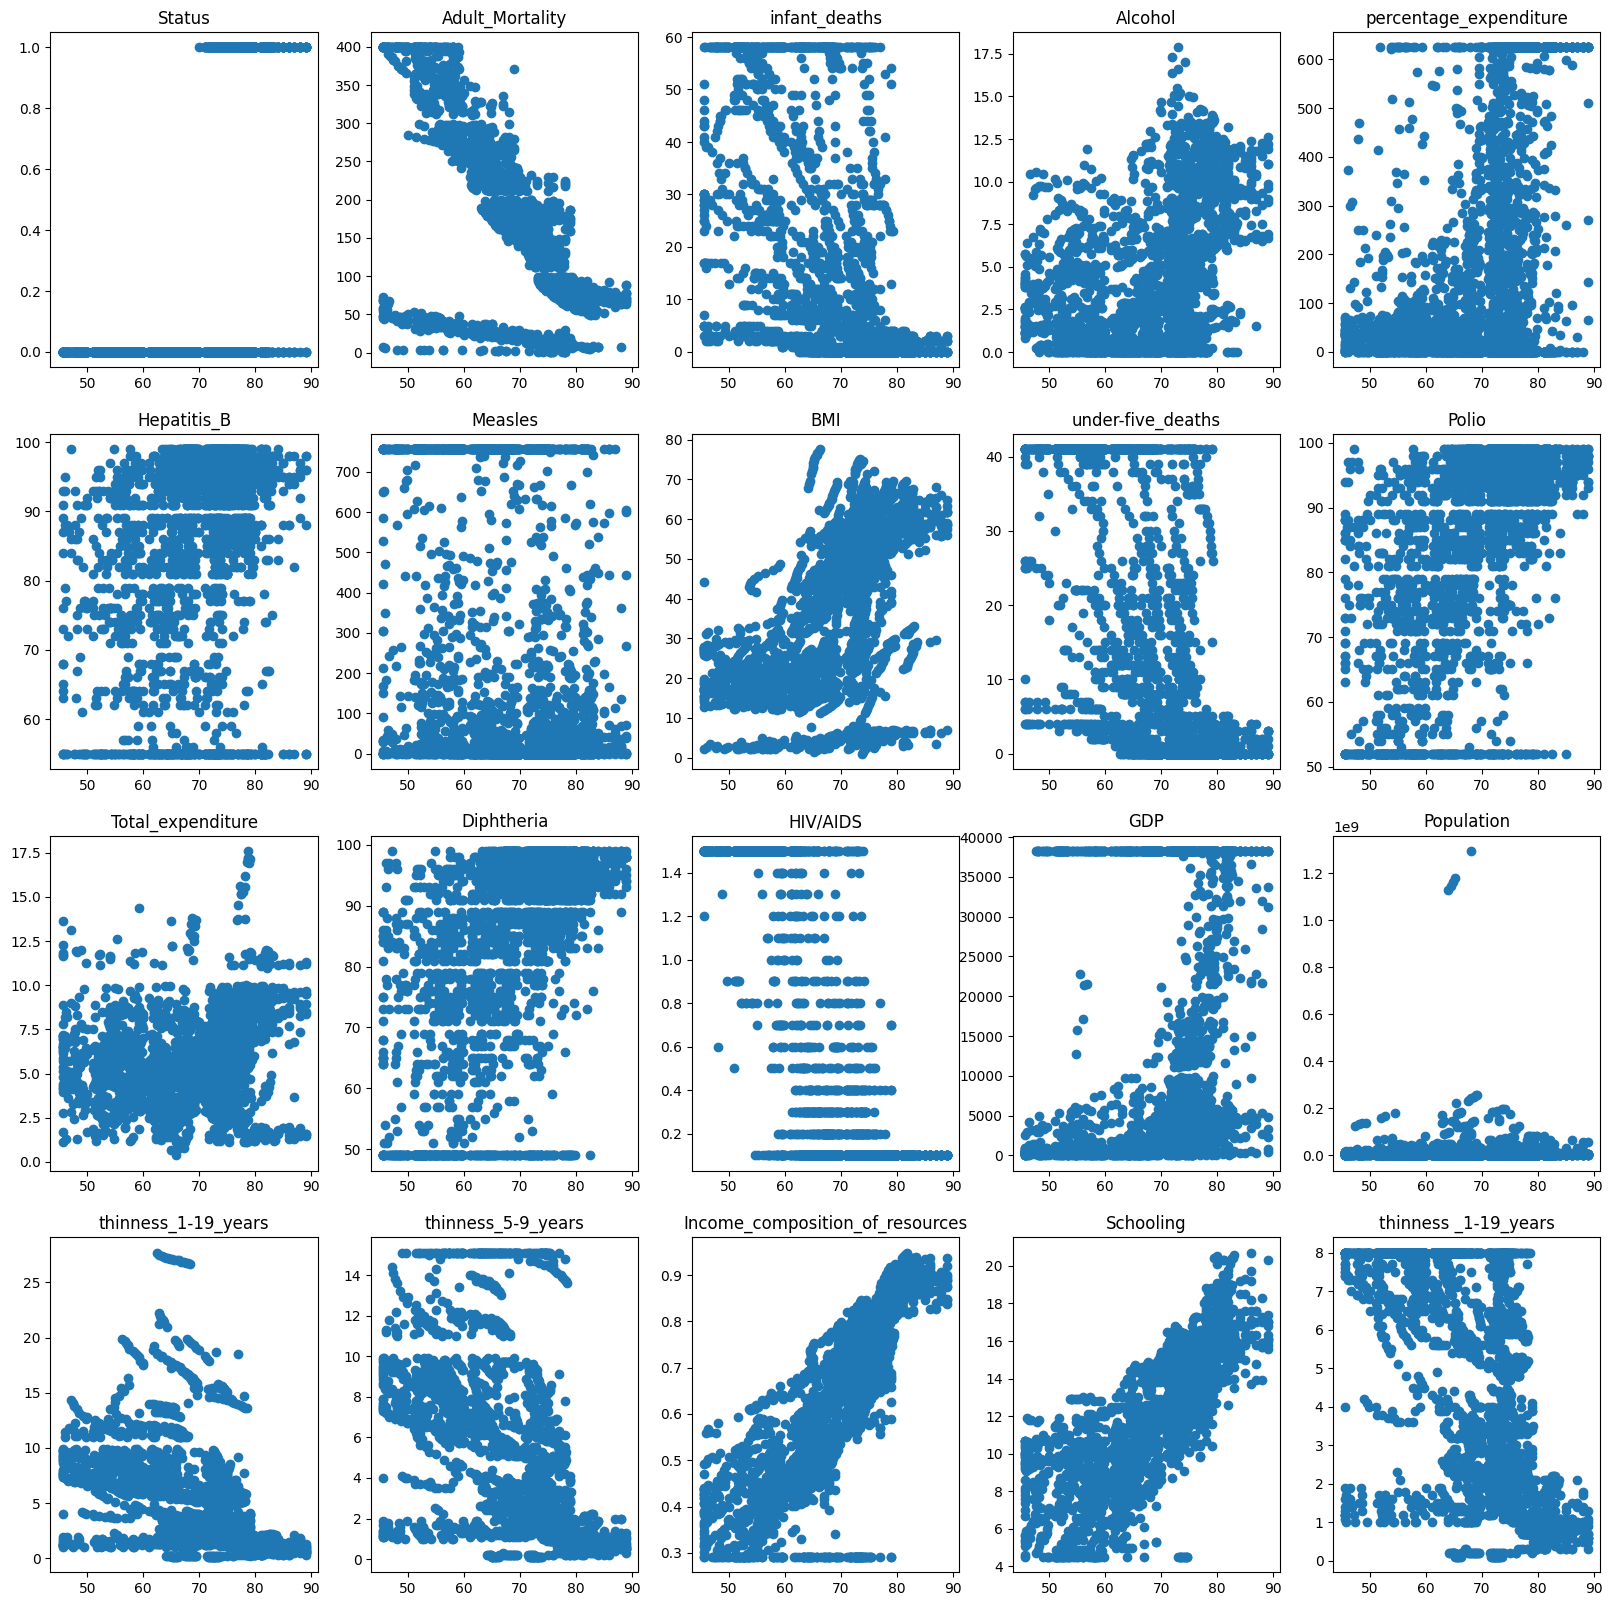

In [ ]:
columns = winsorizedNumericalImputedFeats.columns.drop(['Life_expectancy', 'Year'])'])
plt.figure(figsize = (20, 20))
for i in range(len(columns)):
    plt.subplot(4, 5, i + 1)
    plt.scatter(winsorizedNumericalImputedFeats['Life_expectancy'], winsorizedNumericalImputedFeats[columns[i]])
    plt.title(columns[i])

<Axes: >

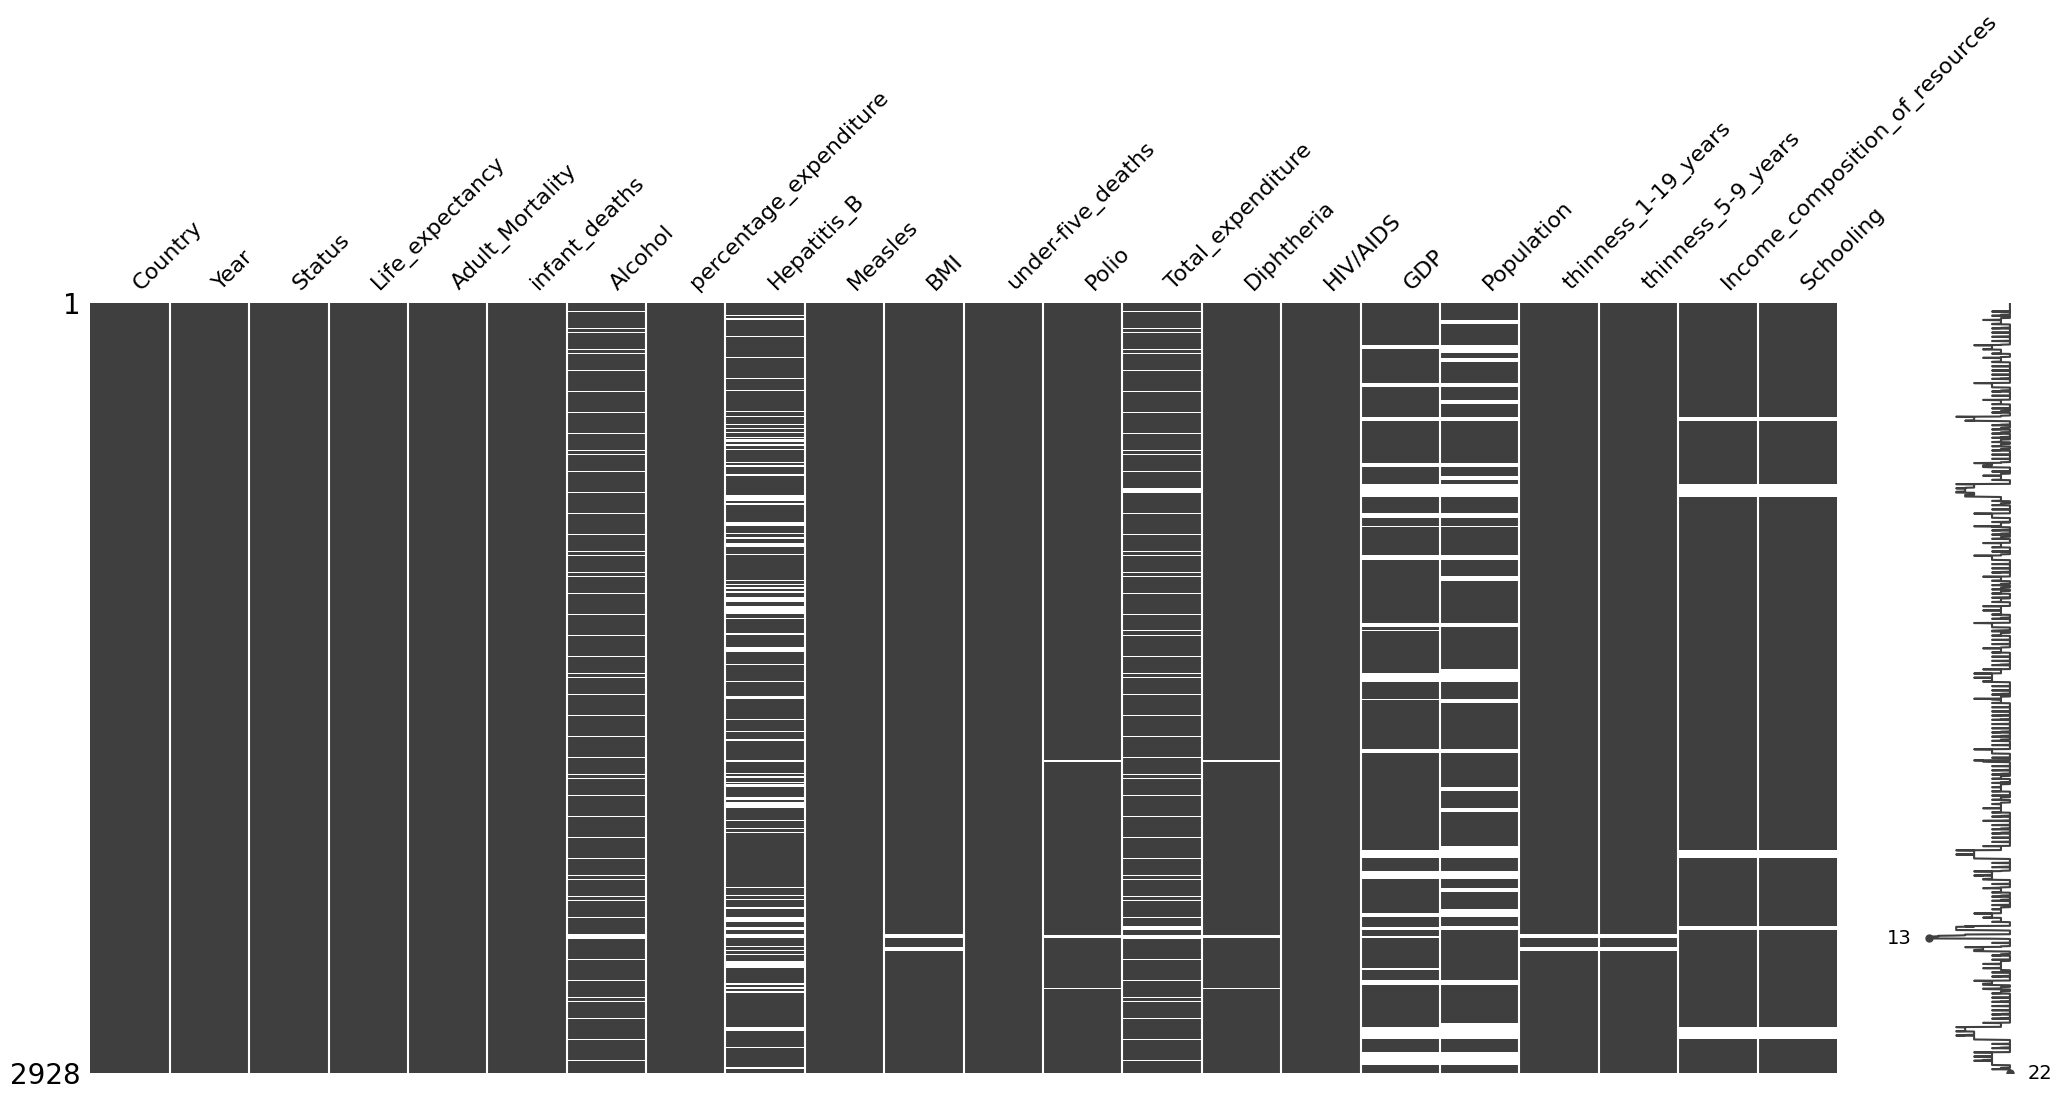

In [ ]:
msno.matrix(data_prediction)

<Axes: >

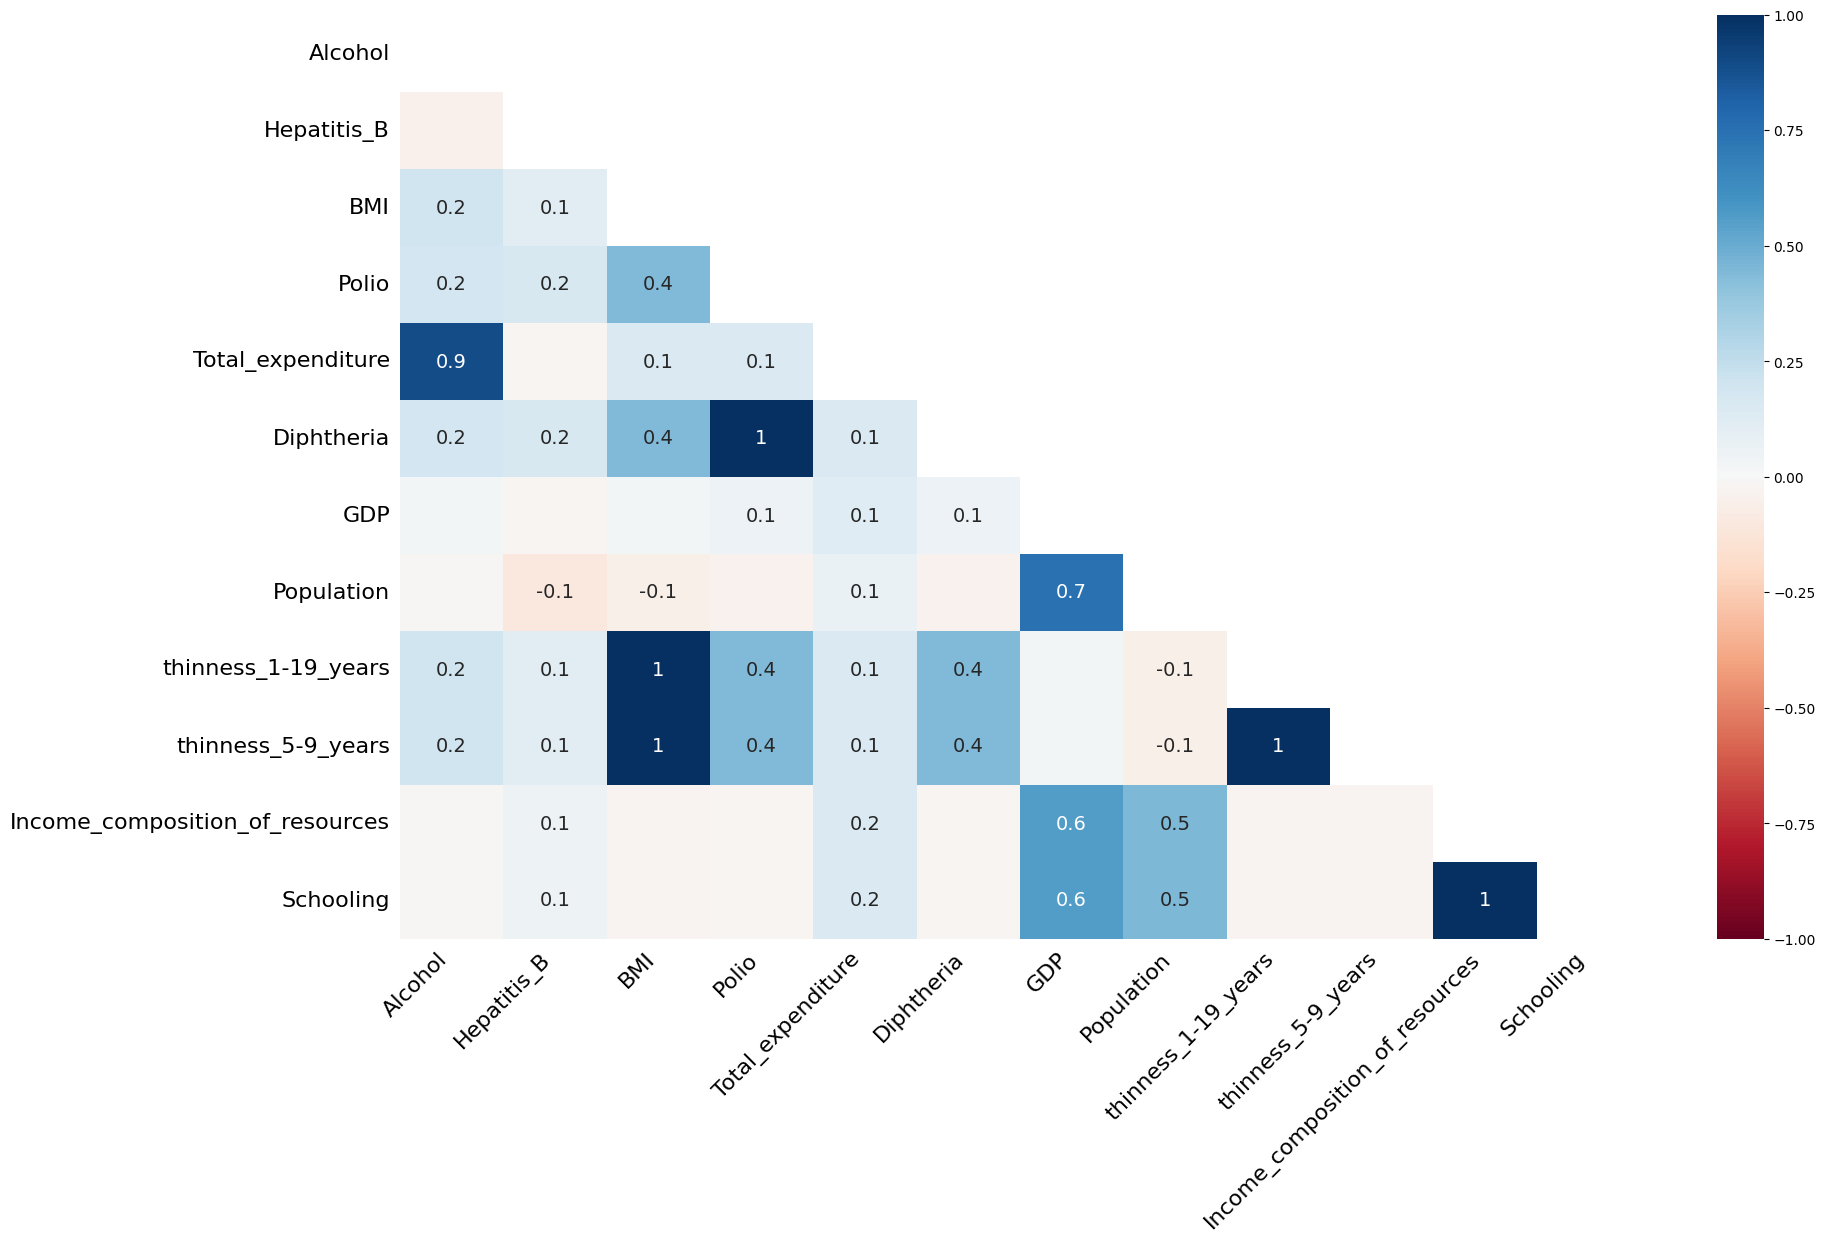

In [ ]:
msno.heatmap(data_prediction)

<Axes: >

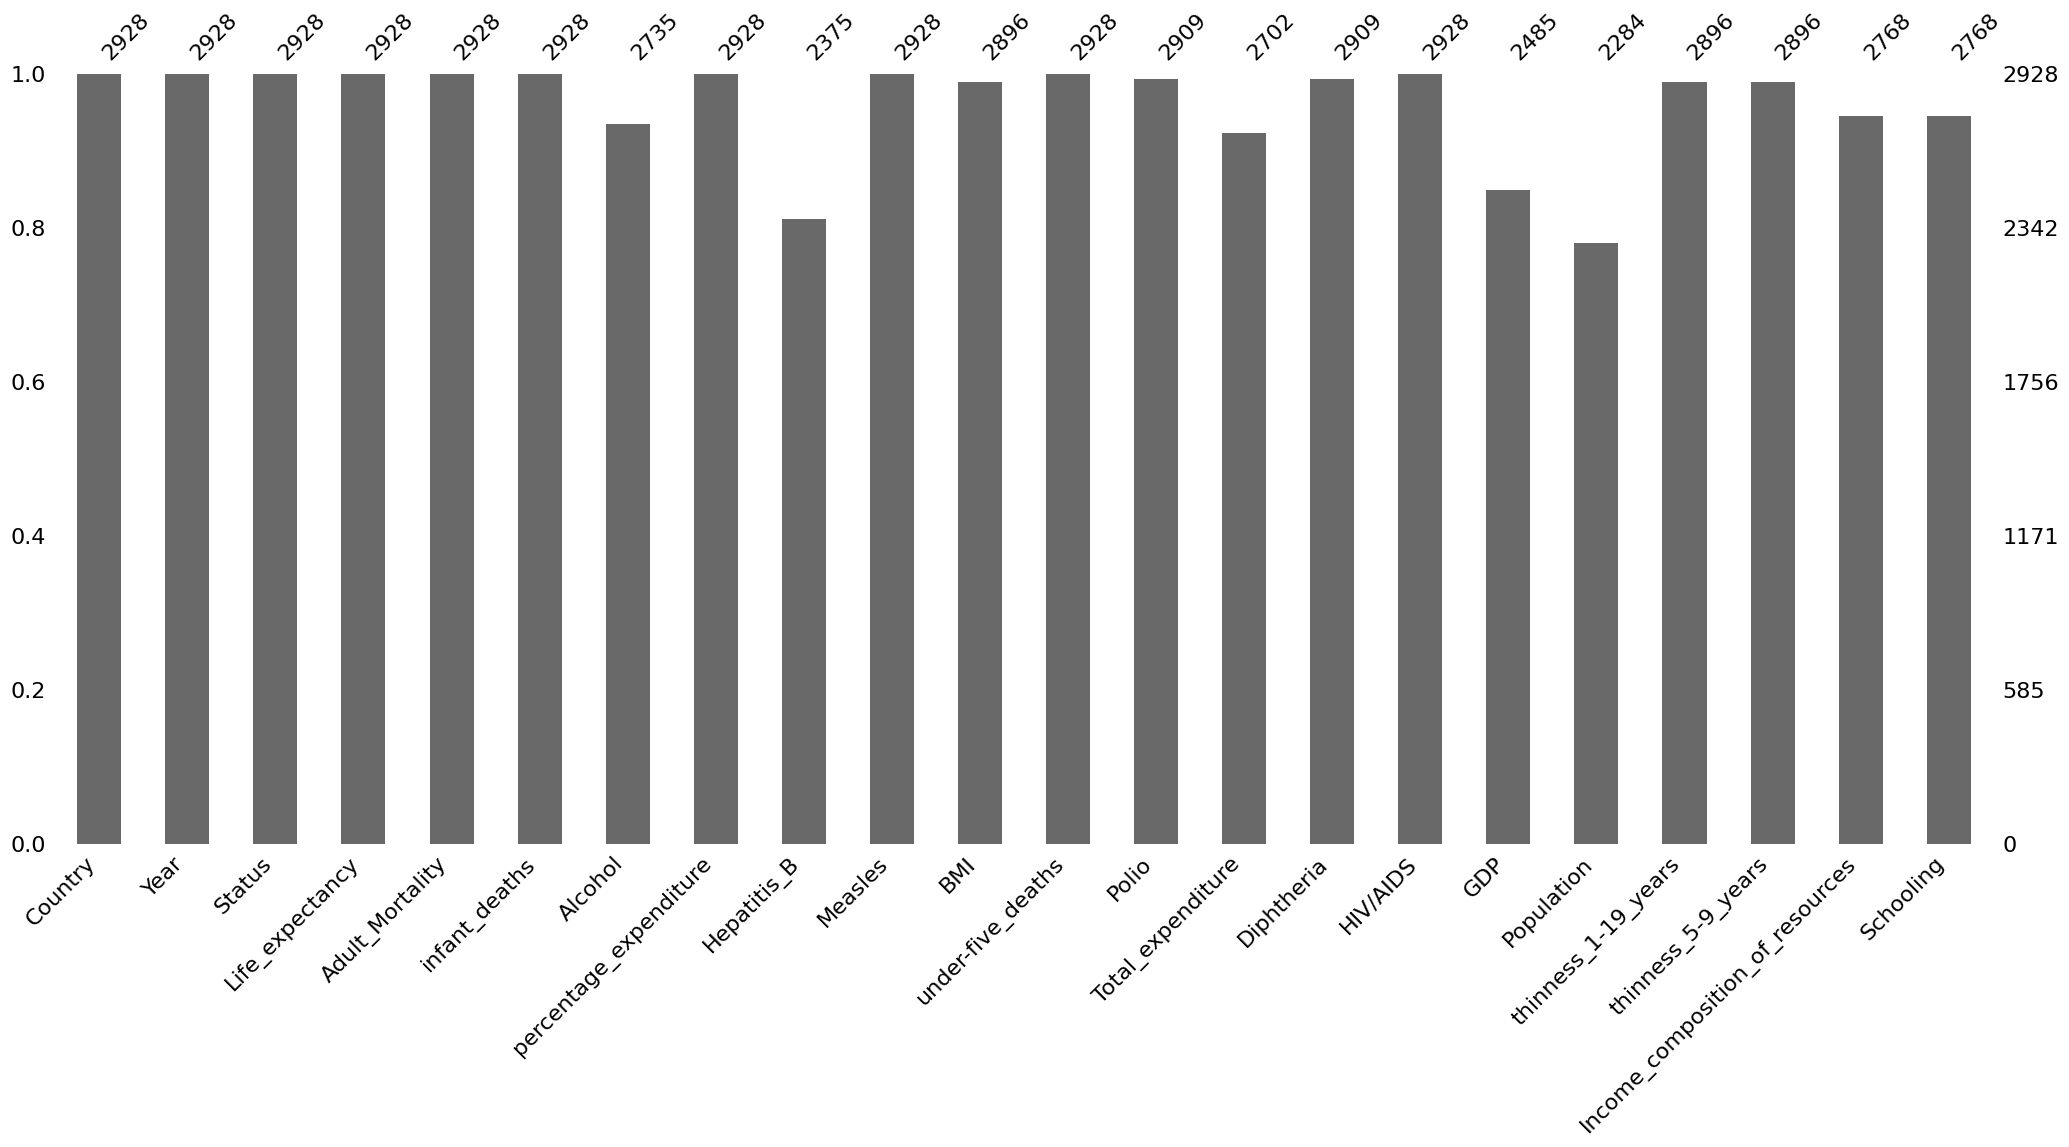

In [ ]:
msno.bar(data_prediction)

Remplaçons les variables nulles de chaque pays par la moyenne du pays correspondant.

In [ ]:
for column in dfExpImputed.columns[5:]:
    dfExpImputed[column] = dfExpImputed.groupby('Country').transform(lambda x: x.fillna(x.mean()))[column]

In [ ]:
dfExpImputed[210:215]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,thinness _1-19_years
210,Barbados,2013,0,75.2,11.0,0,8.74,263.037284,91.0,0,...,7.57,91.0,0.1,15472.78140,NaN,3.8,3.8,0.792,15.3,3.8
211,Barbados,2012,0,75.1,12.0,0,8.61,260.004386,87.0,0,...,7.43,87.0,0.1,15384.87490,NaN,3.8,3.8,0.785,15.3,3.8
212,Barbados,2011,0,74.9,14.0,0,8.51,173.982563,91.0,0,...,6.67,91.0,0.1,15534.15740,NaN,3.8,3.8,0.780,15.5,3.8
213,Barbados,2010,0,74.7,16.0,0,8.41,154.963086,86.0,0,...,6.17,86.0,0.1,1595.91232,NaN,3.8,3.8,0.781,15.8,3.8
214,Barbados,2009,0,74.6,19.0,0,8.46,327.161813,93.0,0,...,6.21,93.0,0.1,16523.32388,NaN,3.8,3.8,0.779,15.5,3.8


In [ ]:
dfExpImputed.dropna(axis=0, how='any', subset=None, inplace=True)

In [ ]:
dfExpImputed.to_excel("output.xlsx")

In [ ]:
dfExpImputed[210:215]

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling,thinness _1-19_years
274,Benin,2013,0,59.5,251.0,25,0.01,87.408042,77.0,637,...,4.59,77.0,1.2,915.267459,14451.0,7.2,7.1,0.466,10.3,7.2
275,Benin,2012,0,59.3,251.0,25,0.01,9.804075,55.0,288,...,4.86,49.0,1.3,837.955100,972916.0,7.4,7.3,0.458,10.0,7.4
276,Benin,2011,0,59.1,251.0,25,1.40,110.263362,75.0,426,...,5.37,75.0,1.4,825.942785,94682.0,7.6,7.5,0.454,9.8,7.6
277,Benin,2010,0,58.7,254.0,25,1.33,94.257379,76.0,392,...,4.95,76.0,1.4,757.695974,9199259.0,7.8,7.6,0.451,9.5,7.8
278,Benin,2009,0,58.4,259.0,25,1.16,71.013992,79.0,756,...,4.46,79.0,1.5,793.452430,894476.0,7.9,7.8,0.448,9.3,7.9


In [ ]:
dfExpImputed.drop(columns=['Country'], inplace=True)

### 1.2 Exploration du jeu de données

---



In [ ]:
dp = data_prediction.copy()

Suppression des colonnes qualitatives

In [ ]:
colonnes_qualitatives = ['Country']

dp = dp.drop(columns=colonnes_qualitatives)

In [ ]:
dp.describe()

,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,...,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,0.174863,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,...,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,0.379915,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,...,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,0.000000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,...,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,0.000000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,...,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,0.000000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,...,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
dp.skew(axis = 0, numeric_only = True)

Year                                0.000000
Status                              1.712798
Life_expectancy                    -0.638605
Adult_Mortality                     1.174369
infant_deaths                       9.771044
Alcohol                             0.587276
percentage_expenditure              4.643790
Hepatitis_B                        -1.933774
Measles                             9.425290
BMI                                -0.230559
under-five_deaths                   9.479623
Polio                              -2.097958
Total_expenditure                   0.577233
Diphtheria                         -2.072601
HIV/AIDS                            5.386623
GDP                                 3.202781
Population                         15.909653
thinness_1-19_years                 1.710626
thinness_5-9_years                  1.776591
Income_composition_of_resources    -1.142142
Schooling                          -0.583884
dtype: float64

Visualisation de la colonne Life_expectancy

In [ ]:
def plot_histogram(data, ylabel, xlabel, title):
    plt.figure(figsize = (10, 6))
    plt.hist(data, edgecolor="black")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

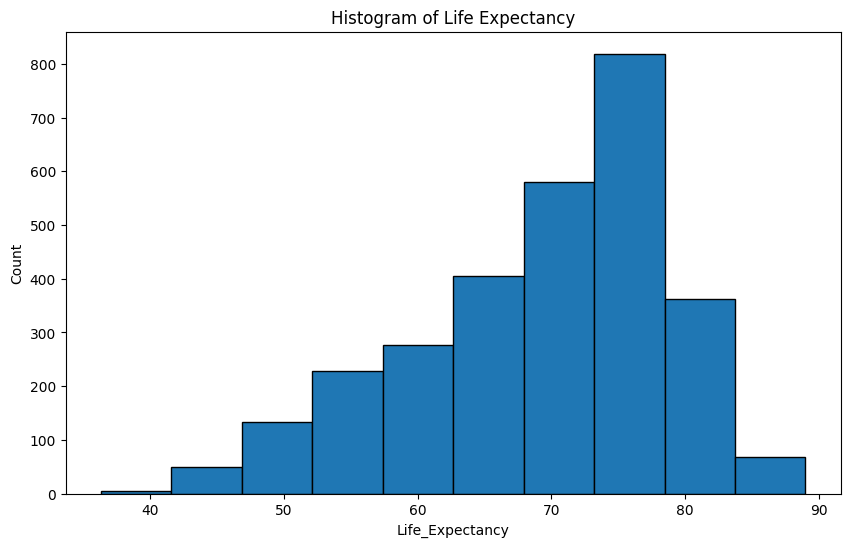

In [ ]:
plot_histogram(dp['Life_expectancy'], 'Count', 'Life_Expectancy', "Histogram of Life Expectancy")

In [ ]:
dp['Life_expectancy'].skew()

-0.6386047358773552

<Axes: xlabel='Life_expectancy'>

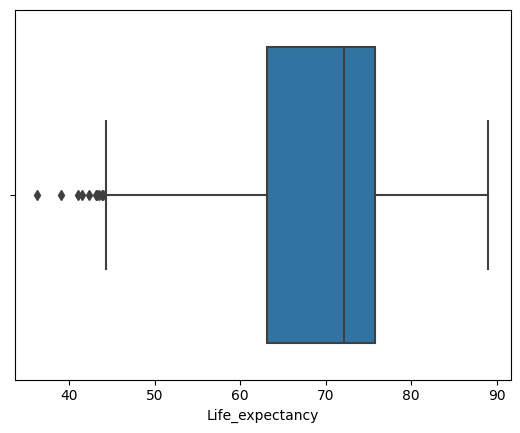

In [ ]:
sns.boxplot(data=dp, x=dp['Life_expectancy'])

Mise à jour des noms des colonnes enfonction de la description de dataset


In [ ]:
variables = ['Adult_Mortality', 'infant_deaths', 'BMI']

Traçage des histogrammes des variables numériques puis d'une matrice de nuage de points pour visualiser les relations entre les variables numériques

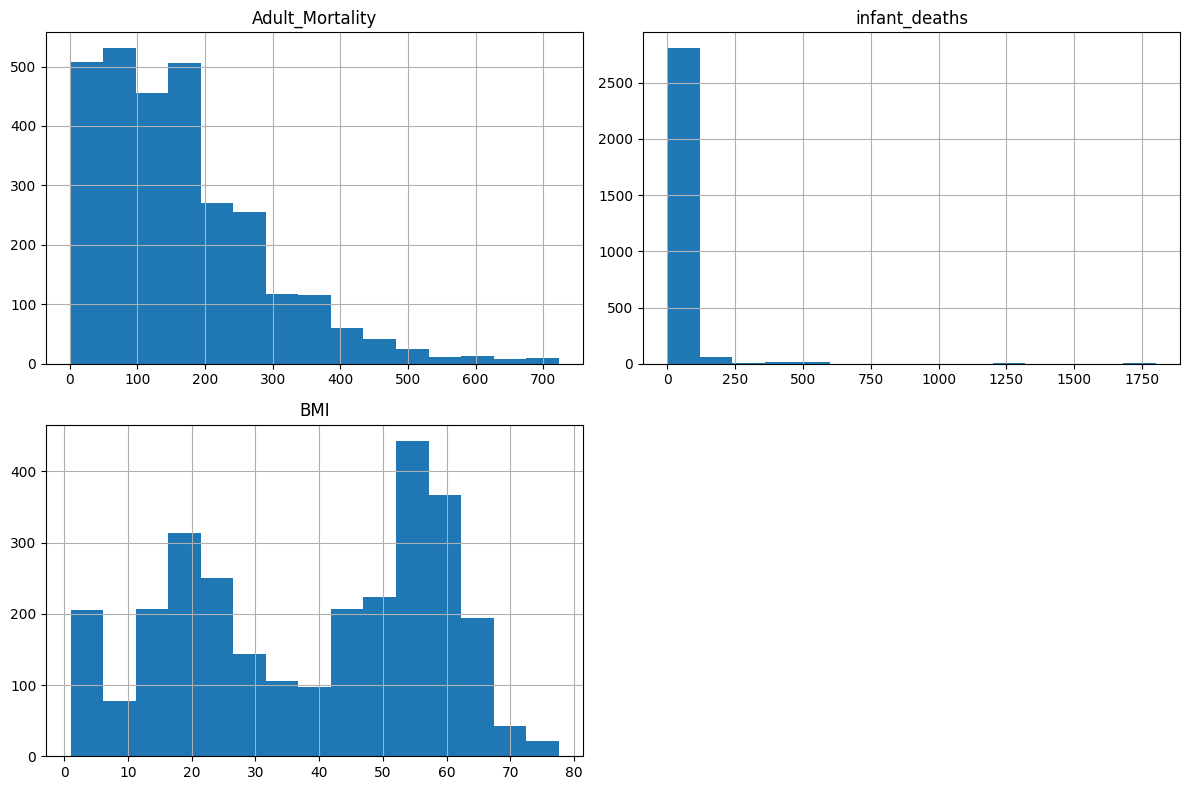

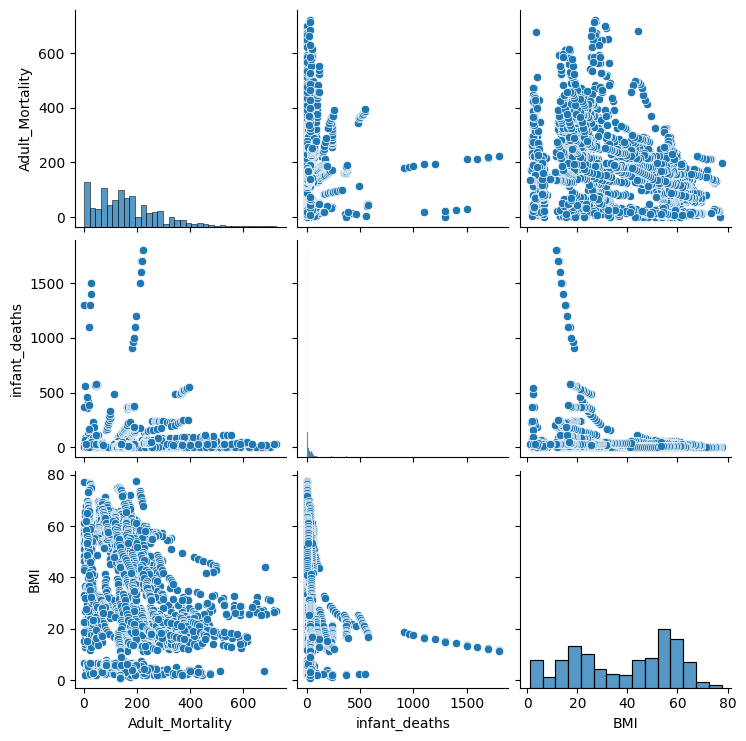

In [ ]:
dp[variables].hist(bins=15, figsize=(12, 8))
plt.tight_layout()
plt.show()


sns.pairplot(dp[variables])
plt.show()


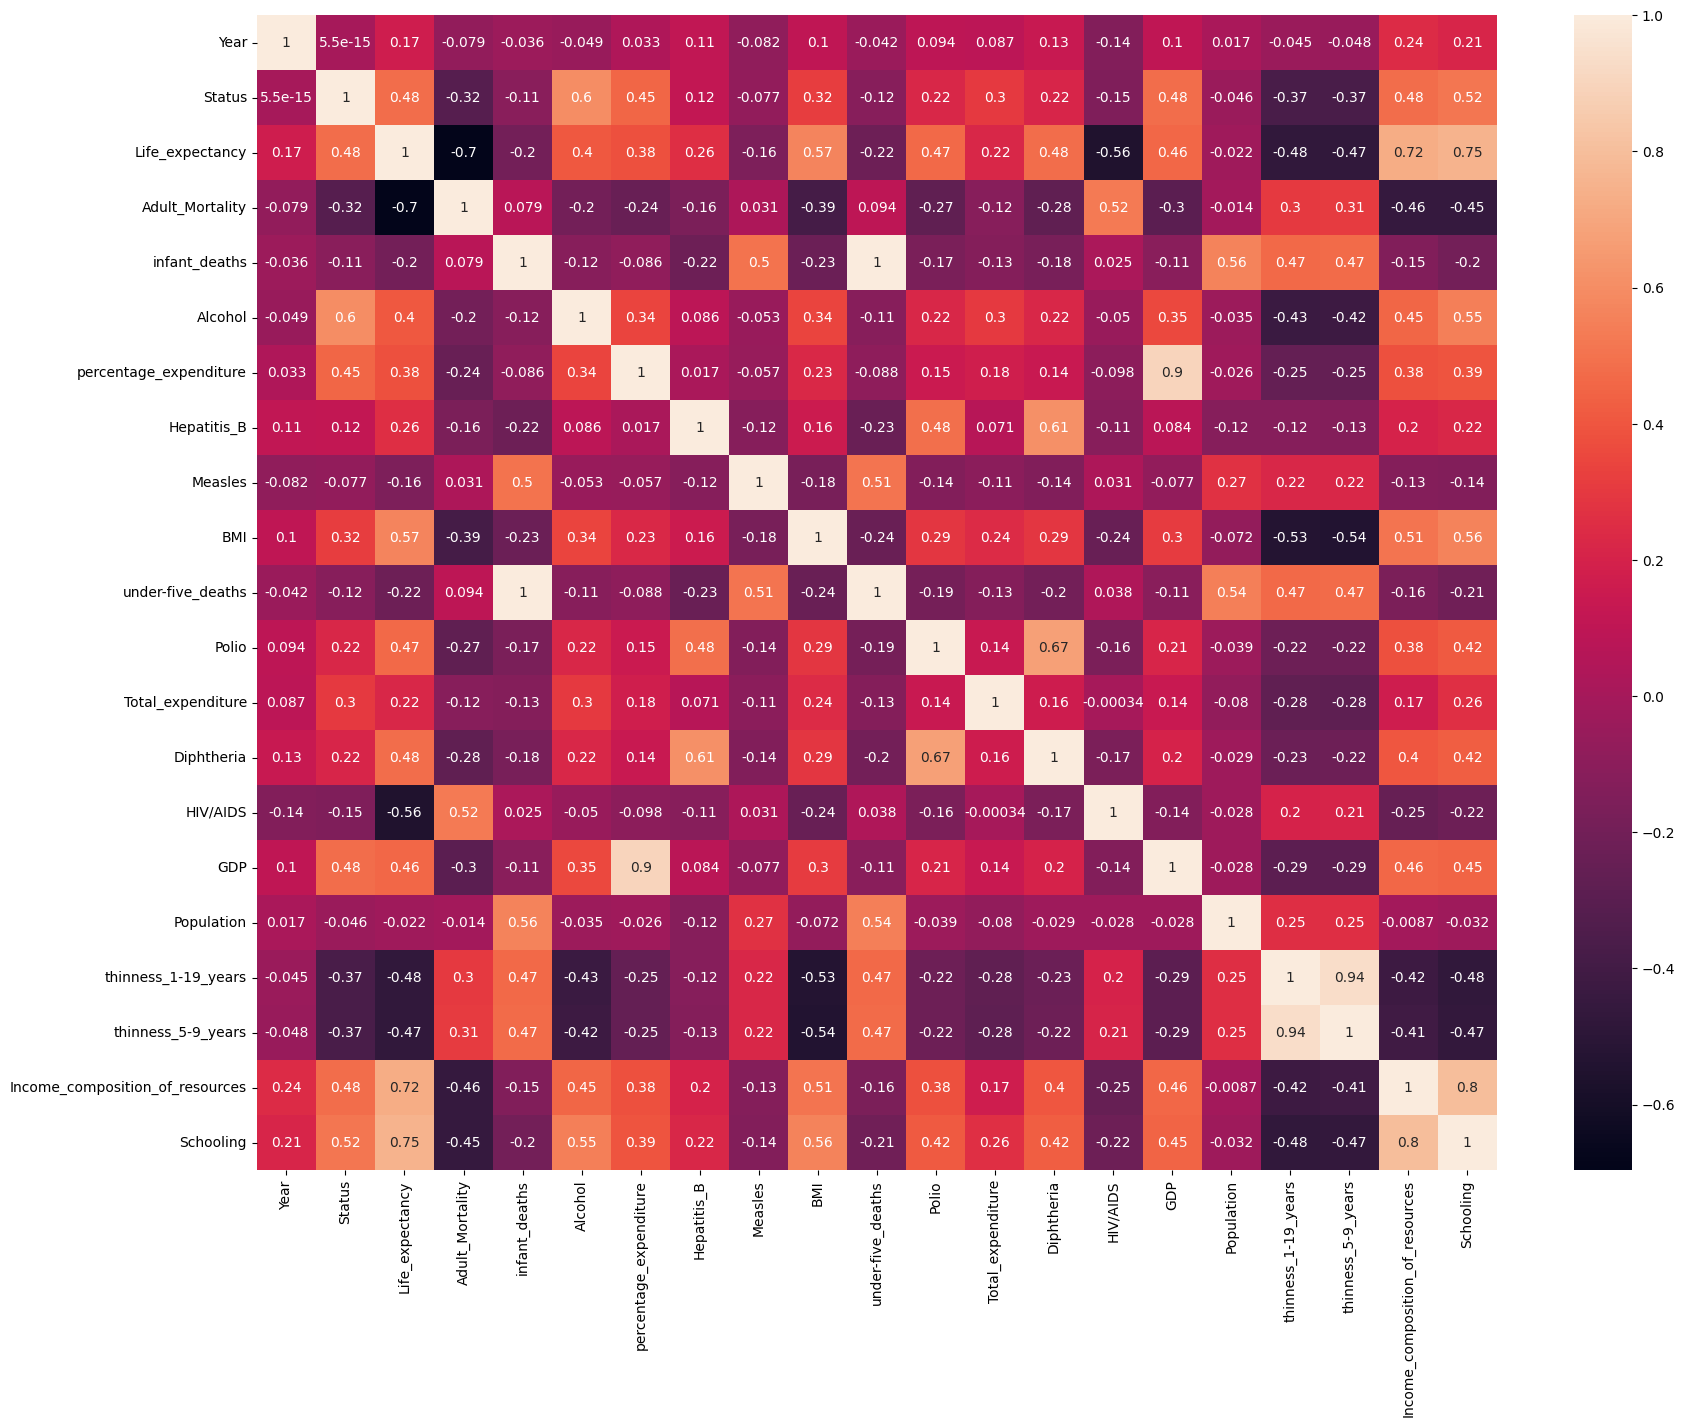

In [ ]:
corr_dp = dp.corr(method="pearson")

plt.figure(figsize=(20, 15))
sns.heatmap(corr_dp, annot=True)
plt.show()

Déterminons les variables qui ont une corrélation absolue > 0,5

In [ ]:
corrLifeExp = abs(corr_dp["Life_expectancy"])
bestFeatures = corrLifeExp[corrLifeExp>0.5]
bestFeatures = bestFeatures.drop('Life_expectancy')
bestFeatures.sort_values()

HIV/AIDS                           0.556556
BMI                                0.567694
Adult_Mortality                    0.696359
Income_composition_of_resources    0.724776
Schooling                          0.751975
Name: Life_expectancy, dtype: float64

### 1.3 Standardisation et Réduction de la dimensionnalité (PCA)
---

Spécification des colonnes qu'il faut tenir en compte lors du standardisation aussi que la variable cible

In [ ]:
selected_columns = ['HIV/AIDS', 'BMI', 'Adult_Mortality', 'Income_composition_of_resources', 'Schooling']
X = dfExpImputed[selected_columns]

# Variable cible
y = dfExpImputed[['Life_expectancy']]

Dévison le jeu de données en Train split et Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
X_train

,HIV/AIDS,BMI,Adult_Mortality,Income_composition_of_resources,Schooling
418,1.0,17.6,33.0,0.398,10.5
778,1.5,5.4,164.0,0.685,12.7
2408,1.5,4.1,397.0,0.635,13.0
677,0.1,58.3,57.0,0.847,13.8
2428,0.1,64.8,61.0,0.871,17.2
...,...,...,...,...,...
1371,1.5,16.9,388.0,0.483,9.7
2300,0.9,22.7,399.0,0.401,9.1
1021,1.5,21.8,34.0,0.491,7.7
1109,0.3,44.1,22.0,0.630,10.6


### 1.3.1 Standardisation

In [ ]:
scaler = StandardScaler()
transformed_X_train = scaler.fit_transform(X_train)
transformed_X_test = scaler.transform(X_test)

In [ ]:
transformed_X_train

array([[ 0.7722126 , -0.94925187, -1.20500013, -1.27372082, -0.38071658],
       [ 1.61214622, -1.56302583, -0.04136155,  0.38745639,  0.32308287],
       [ 1.61214622, -1.62842797,  2.02831624,  0.09805269,  0.41905552],
       ...,
       [ 1.61214622, -0.73795264, -1.1961174 , -0.73542995, -1.27646133],
       [-0.40369447,  0.38394565, -1.30271024,  0.06911232, -0.34872569],
       [-0.73966792,  1.81273092, -0.2190163 ,  0.41639675,  0.38706464]])

In [ ]:
pd.DataFrame(transformed_X_train, columns=X_train.columns).head(2)

,HIV/AIDS,BMI,Adult_Mortality,Income_composition_of_resources,Schooling
0,0.772213,-0.949252,-1.205000,-1.273721,-0.380717
1,1.612146,-1.563026,-0.041362,0.387456,0.323083


### 1.3.2 PCA

 Créons nous un objet PCA de sklearn.
 Puis on fit les données standardisées dans PCA.
 Ici, on a choisi 90% comme un seuil pour réduire la dimensionnalité et le brouille
 en expliquant 90% de la variance original du dataset

In [ ]:
pca = PCA(n_components=0.9)
pca_data = pca.fit(transformed_X_train)
pca_data.explained_variance_ratio_

array([0.66289295, 0.14076073, 0.09624962, 0.07843389])

D'après le seuil 90% qu'ont spécifié seulement 4 attributs ont été conservé de 5 attributs.
Cela va peut améliorer la performance de notre algorithme d'encore plus.

Convertissons maintenant le pourcentage de variance pour que ça soit facile de
comprendre la variance de chaque component en calculant la fréquence cumulée.

In [ ]:
np.cumsum(np.round(pca_data.explained_variance_ratio_, decimals = 4) * 100)

array([66.29, 80.37, 89.99, 97.83])

Visualisons nouns maintenons les poids des attributs de chaque component

In [ ]:
loadings = pca_data.components_

labels = ['PC' + str(x) for x in range(1, pca_data.n_components_+1)]

loadings_df = pd.DataFrame.from_dict(dict(zip(labels, loadings)))
loadings_df['variable'] = X_train.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4
variable,,,,
HIV/AIDS,0.442766,-0.327220,-0.157369,0.818466
BMI,-0.415438,-0.369580,-0.827094,-0.081464
Adult_Mortality,0.379793,-0.766850,0.198315,-0.476213
Income_composition_of_resources,-0.500776,-0.244584,0.332715,0.194624
Schooling,-0.486159,-0.329329,0.375663,0.242528


Visualizing our weights on a heatmap

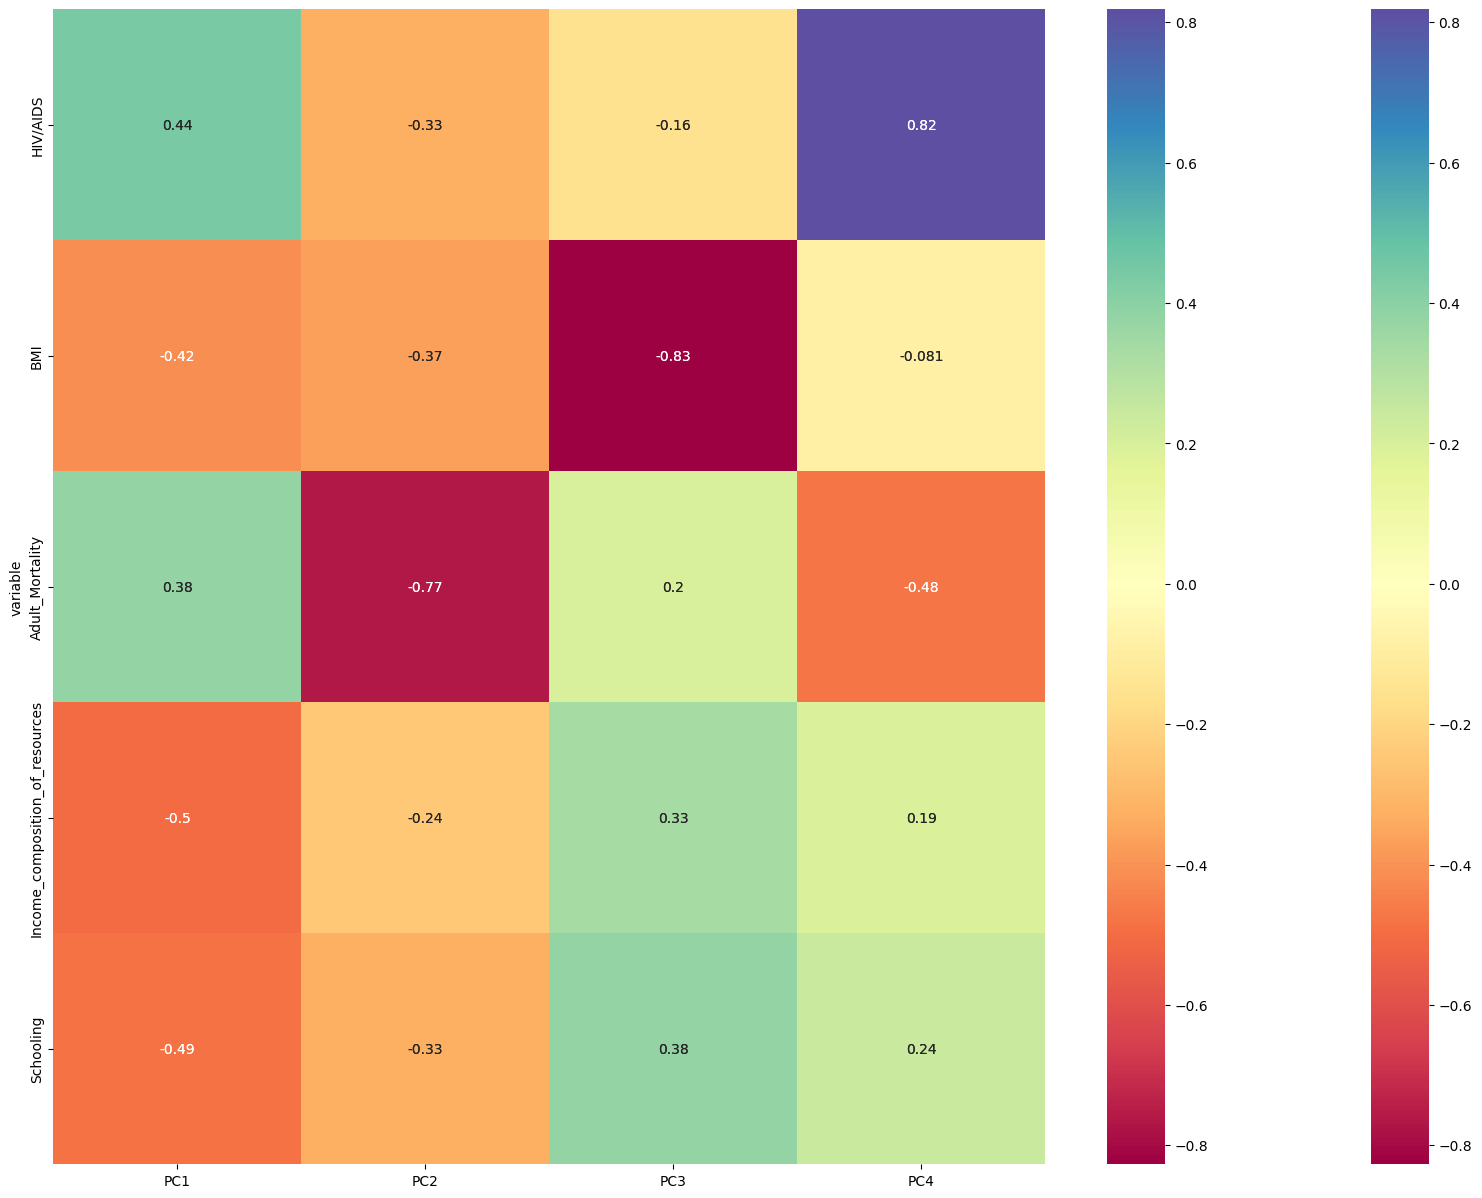

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
sns.heatmap(loadings_df, annot=True, cmap='Spectral', ax=ax)

plt.show()

Séparons entre une partie de PCA et autre sans PCA

In [ ]:
npX_train = transformed_X_train
npX_test = transformed_X_test
X_train = pca.transform(transformed_X_train)
X_test = pca.transform(transformed_X_test)

In [ ]:
X_train.shape

(1915, 4)

In [ ]:
X_test.shape

(213, 4)

In [ ]:
y_train.shape

(1915, 1)

In [ ]:
y_test.shape

(213, 1)

#  2 Models building

### 2.1 Models preparation

In [ ]:
def CallModel(model, X_train, X_test, y_train, y_test):

    """
    This function is for performing classifcation algorithms such as Logistic Regression, Decision Tree, Random Forest, and SVM.

    Parameters
    ----------
    model_type: 'Decision Tree', 'XGBoost', 'Random Forest', 'Linear Regression'
    the type of classifcation algorithm you would like to apply

    x_train: dataframe
    the independant variables of the training data

    x_val: dataframe
    the independant variables of the validation data

    y_train: series
    the target variable of the training data

    y_val: series
    the target variable of the validation data

    """

    model.fit(X_train, y_train.values.ravel())
    predictions = model.predict(X_test)


    # The different error evaluation metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
    print('\nMean Squared Error:', metrics.mean_squared_error(y_test, predictions))
    print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, predictions))

    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    print(f'\nTrain Score: {train_score} \t\t Test Score: {test_score}')


    # The predicted vs the actual comparison
    y_pred_model1 = pd.DataFrame( { "actual": y_test.values.ravel(), "predicted_prob": model.predict(X_test) } )
    print(y_pred_model1.head(10))



    plt.figure(figsize=(10, 5))
    plt.scatter(y_test.values.ravel(), predictions, s=20, label='Data Points')
    plt.title('Predicted vs. Actual')
    plt.xlabel('Actual Life Expectancy at Birth')
    plt.ylabel('Predicted Life Expectancy at Birth')

    plt.plot([min(y_test.values.ravel()), max(y_test.values.ravel())], [min(y_test.values.ravel()), max(y_test.values.ravel())], label='Perfect Prediction')
    plt.legend()
    plt.tight_layout()

    plt.show()


    return model

In [ ]:
suggestedModels = { "Decision Tree": DecisionTreeRegressor(random_state=0),
                    "XGBoost": XGBRegressor(random_state=0),
                    "Random Forest": RandomForestRegressor(n_estimators = 100),
                    "Linear Regression": LinearRegression()
                   }

### 2.2 Model training and testing
---

Decision Tree:
~~~~~~~~~~~~~~~~~~ 

Mean Absolute Error: 1.3765258215962437

Mean Squared Error: 5.308732394366198

Root Mean Squared Error: 2.304068660948757
Mean Absolute Percentage Error (MAPE): 0.020989946607341943

Train Score: 1.0 		 Test Score: 0.9354619686526343
   actual  predicted_prob
0    72.1            73.9
1    63.0            66.0
2    66.6            66.2
3    65.4            65.8
4    89.0            88.0
5    63.4            69.7
6    81.1            85.0
7    73.9            73.8
8    59.7            59.8
9    74.0            74.1


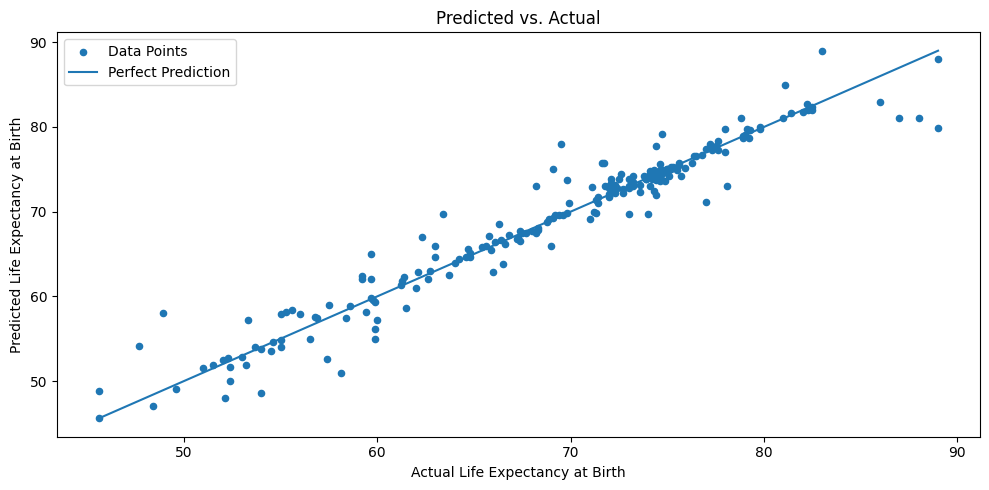

XGBoost:
~~~~~~~~~~~~~~~~~~ 

Mean Absolute Error: 1.3597001841370486

Mean Squared Error: 3.8159826189605077

Root Mean Squared Error: 1.9534540227403632
Mean Absolute Percentage Error (MAPE): 0.020436696758137494

Train Score: 0.9979720222149862 		 Test Score: 0.9536092634571612
   actual  predicted_prob
0    72.1       73.379898
1    63.0       61.577866
2    66.6       67.239449
3    65.4       64.632294
4    89.0       82.417282
5    63.4       67.342926
6    81.1       84.640236
7    73.9       74.181595
8    59.7       58.818703
9    74.0       74.710098


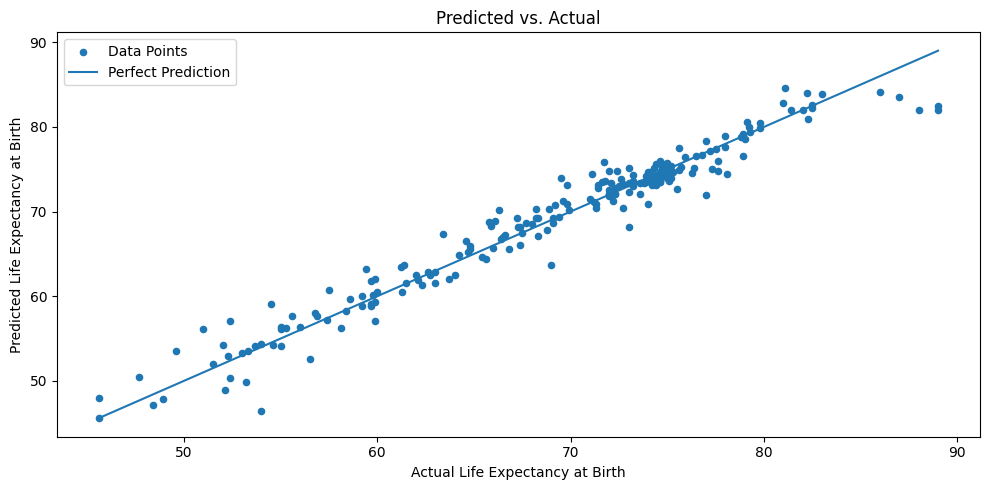

Random Forest:
~~~~~~~~~~~~~~~~~~ 

Mean Absolute Error: 1.180746478873234

Mean Squared Error: 3.250223131455388

Root Mean Squared Error: 1.8028375222008743
Mean Absolute Percentage Error (MAPE): 0.01767895634149592

Train Score: 0.9938990836965 		 Test Score: 0.9604871772089306
   actual  predicted_prob
0    72.1          73.036
1    63.0          61.036
2    66.6          66.848
3    65.4          65.299
4    89.0          82.275
5    63.4          69.133
6    81.1          84.198
7    73.9          73.544
8    59.7          61.172
9    74.0          73.978


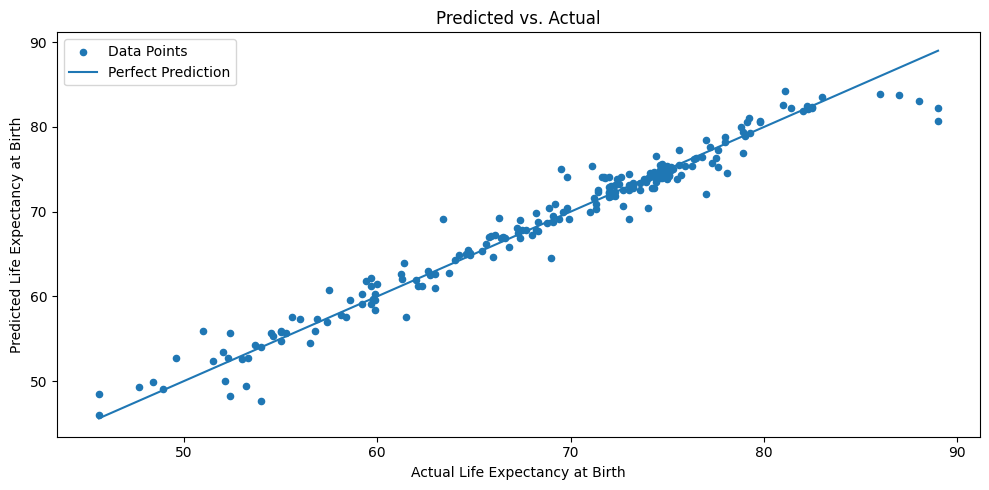

Linear Regression:
~~~~~~~~~~~~~~~~~~ 

Mean Absolute Error: 2.7488923482344694

Mean Squared Error: 13.121203156060664

Root Mean Squared Error: 3.6223201343973814
Mean Absolute Percentage Error (MAPE): 0.04157961640202651

Train Score: 0.8325751081581414 		 Test Score: 0.8404860976794261
   actual  predicted_prob
0    72.1       71.690586
1    63.0       58.122329
2    66.6       65.776996
3    65.4       63.125544
4    89.0       78.978847
5    63.4       66.481434
6    81.1       79.770506
7    73.9       72.541463
8    59.7       64.692065
9    74.0       74.670402


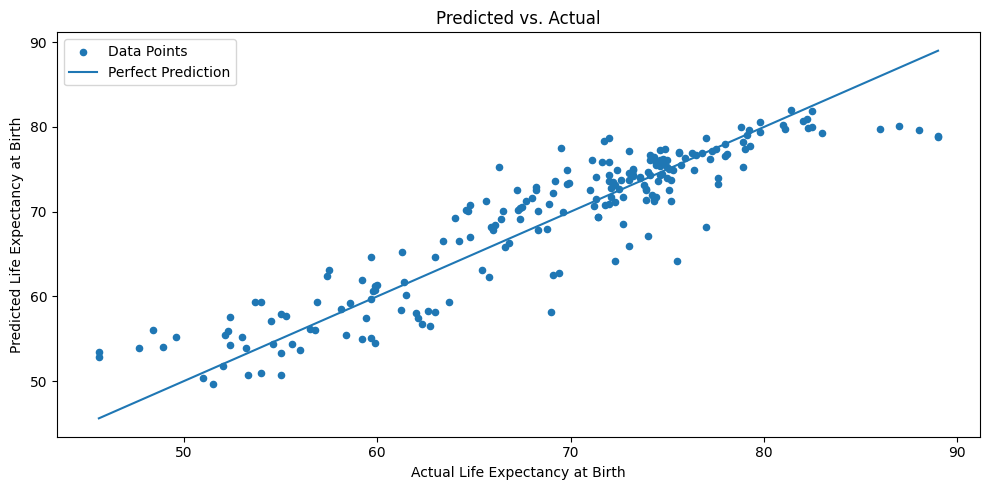

In [ ]:
for modelName, model in suggestedModels.items():
    print(f"{modelName}:")
    print("~~~~~~~~~~~~~~~~~~ \n")
    CallModel(model, transformed_X_train, transformed_X_test, y_train, y_test)

Decision Tree:
~~~~~~~~~~~~~~~~~~ 

Mean Absolute Error: 1.9014084507042253

Mean Squared Error: 9.76018779342723

Root Mean Squared Error: 3.124129925823705
Mean Absolute Percentage Error (MAPE): 0.029203125602778875

Train Score: 1.0 		 Test Score: 0.8813458168588689
   actual  predicted_prob
0    72.1            71.4
1    63.0            59.1
2    66.6            63.2
3    65.4            65.4
4    89.0            79.5
5    63.4            68.4
6    81.1            85.0
7    73.9            73.8
8    59.7            61.7
9    74.0            74.1


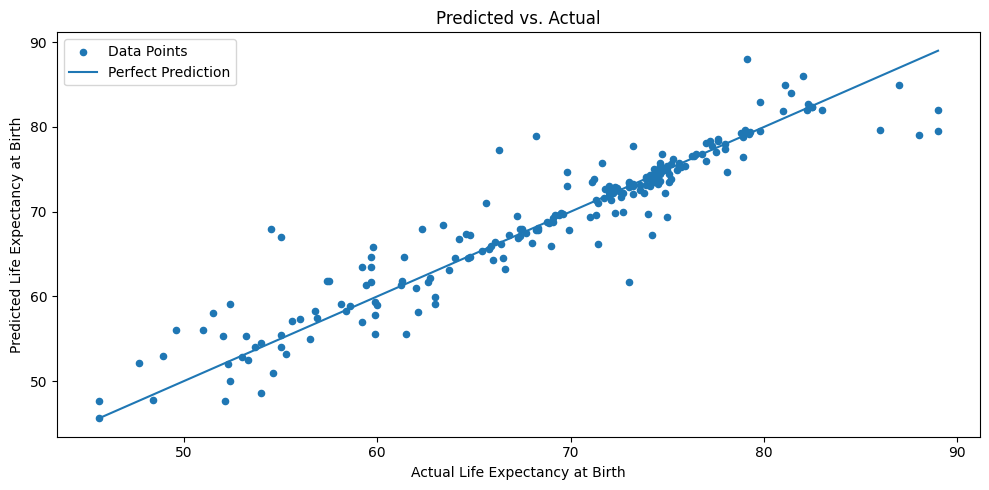

XGBoost:
~~~~~~~~~~~~~~~~~~ 

Mean Absolute Error: 1.6918866117235638

Mean Squared Error: 6.30303400109689

Root Mean Squared Error: 2.5105843943386748
Mean Absolute Percentage Error (MAPE): 0.025438363459333438

Train Score: 0.9953924422230559 		 Test Score: 0.923374286792456
   actual  predicted_prob
0    72.1       72.191902
1    63.0       63.292782
2    66.6       67.278008
3    65.4       65.907539
4    89.0       82.518761
5    63.4       63.588612
6    81.1       84.814812
7    73.9       72.953598
8    59.7       60.073154
9    74.0       73.729027


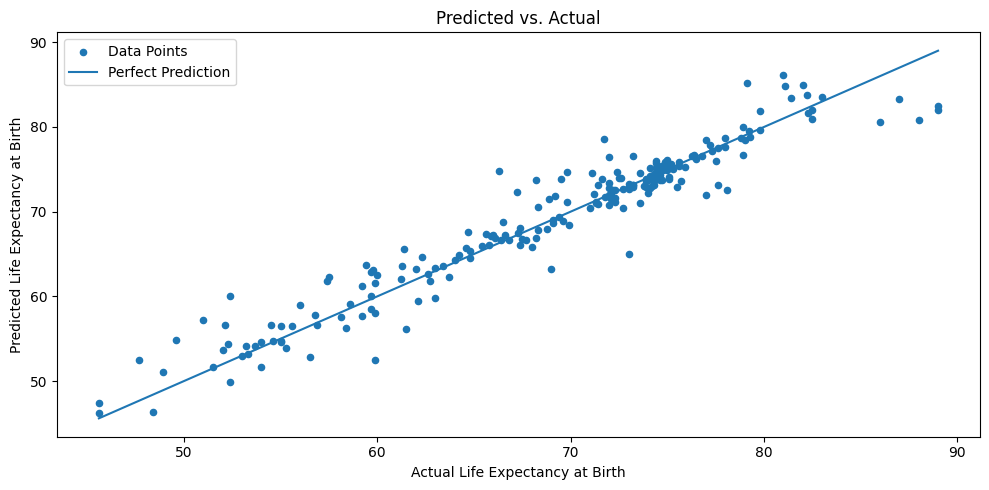

Random Forest:
~~~~~~~~~~~~~~~~~~ 

Mean Absolute Error: 1.5838826291079784

Mean Squared Error: 5.550349704225339

Root Mean Squared Error: 2.3559180172971512
Mean Absolute Percentage Error (MAPE): 0.024043645354314025

Train Score: 0.9906815821324586 		 Test Score: 0.9325246374105653
   actual  predicted_prob
0    72.1          71.848
1    63.0          62.304
2    66.6          66.792
3    65.4          64.616
4    89.0          81.172
5    63.4          66.222
6    81.1          84.182
7    73.9          73.179
8    59.7          62.115
9    74.0          74.164


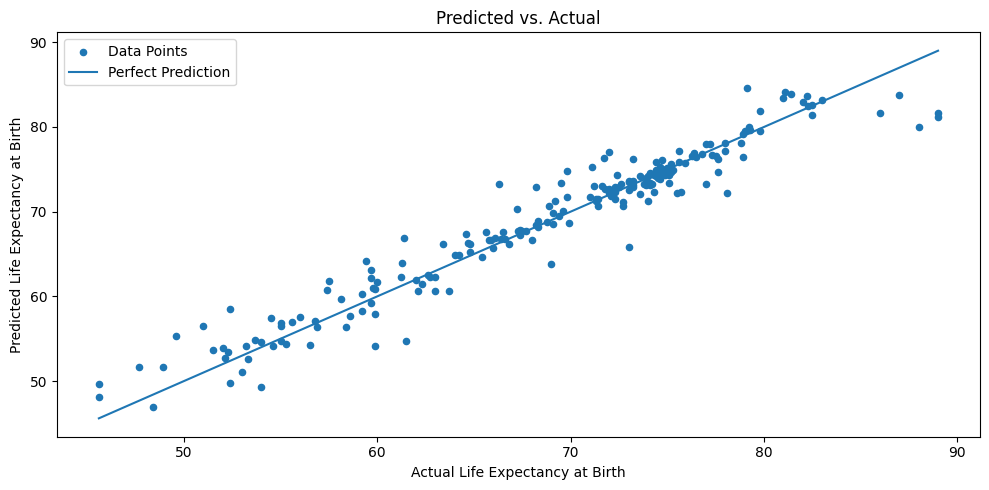

Linear Regression:
~~~~~~~~~~~~~~~~~~ 

Mean Absolute Error: 2.784701097577173

Mean Squared Error: 13.410601111292204

Root Mean Squared Error: 3.66204875872676
Mean Absolute Percentage Error (MAPE): 0.04221471935395252

Train Score: 0.8251629199604495 		 Test Score: 0.8369678991869917
   actual  predicted_prob
0    72.1       71.562628
1    63.0       57.737678
2    66.6       65.927134
3    65.4       62.687700
4    89.0       79.052257
5    63.4       66.139319
6    81.1       80.151275
7    73.9       72.228104
8    59.7       64.731267
9    74.0       73.808081


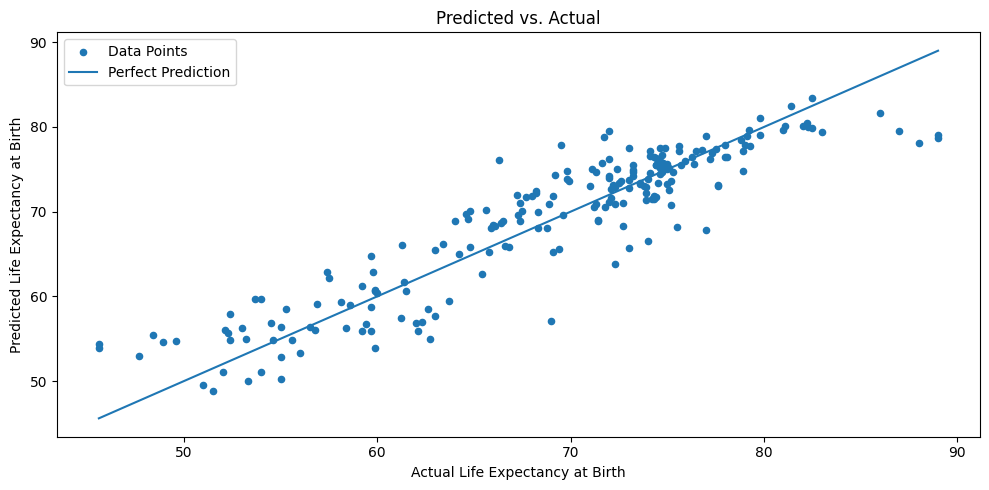

In [ ]:
for modelName, model in suggestedModels.items():
    print(f"{modelName}:")
    print("~~~~~~~~~~~~~~~~~~ \n")
    CallModel(model, X_train, X_test, y_train, y_test)